<a href="https://colab.research.google.com/github/Nirmal82733/machine_learning_/blob/main/Netflix_Movies_And_TvShows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Netflix movie and TV show Clustering



##### **Project Type - Unsupervised**
##### **Contribution - Individual**

# **Project Summary -**



This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

**In this project, you are required to do**
*   Exploratory Data Analysis
*   Understanding what type content is available in different countries
*   If Netflix has been increasingly focusing on TV rather than movies in recent years.
*   Clustering similar content by matching text-based features

# **GitHub Link -**

# **Problem Statement**


**"We're diving into Netflix's 2019 data to uncover fascinating insights! Our focus is on understanding the trends in content—what's popular, how globally available it is, and any shifts in attention between movies and TV shows. We're not stopping there; we're also connecting with external datasets and using advanced techniques to group similar content based on the words used. This way, we hope to reveal the secrets behind Netflix's content strategy and what makes their offerings so unique!"**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go

import string
string.punctuation
import nltk
nltk.download('punkt')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram

import warnings;warnings.filterwarnings('ignore')
import warnings;warnings.simplefilter('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")
df

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                NaN                                            Nasty C   
7785                NaN                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                                NaN   

                                                country          date_added  \
0                                                Brazil     August 14, 2020   
1                                                Mexico   December 23, 2016   
2                                             Singapore   December 20, 2018   
3                                         United States   November 16, 2017   
4                                         United States     January 1, 2020   
...                                                 ...                 ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
0     In a future where the elite inhabit an island ...  
1     After a devast

### Dataset First View

In [4]:
# Dataset First Look
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print(f"Rows and Column count in the Dataset: Rows= {df.shape[0]}, Columns= {df.shape[1]}")

Rows and Column count in the Dataset: Rows= 7787, Columns= 12


### Dataset Information

In [6]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
print(f"The total number of duplicated observations in the dataset: {df.duplicated().sum()}")

The total number of duplicated observations in the dataset: 0


#### Missing Values/Null Values

In [8]:
# Display null value count and percentage for each variable
print("-" * 50)
print("Null value count and percentage in each variable:")
print("-" * 50)

# Null value count
null_count = df.isnull().sum()

# Percentage of null values
null_percentage = (null_count / len(df)) * 100

# Display results in a DataFrame
null_info = pd.DataFrame({
    "Null Count": null_count,
    "Percentage": null_percentage
})

print(null_info)
print("-" * 50)


--------------------------------------------------
Null value count and percentage in each variable:
--------------------------------------------------
              Null Count  Percentage
show_id                0    0.000000
type                   0    0.000000
title                  0    0.000000
director            2389   30.679337
cast                 718    9.220496
country              507    6.510851
date_added            10    0.128419
release_year           0    0.000000
rating                 7    0.089893
duration               0    0.000000
listed_in              0    0.000000
description            0    0.000000
--------------------------------------------------


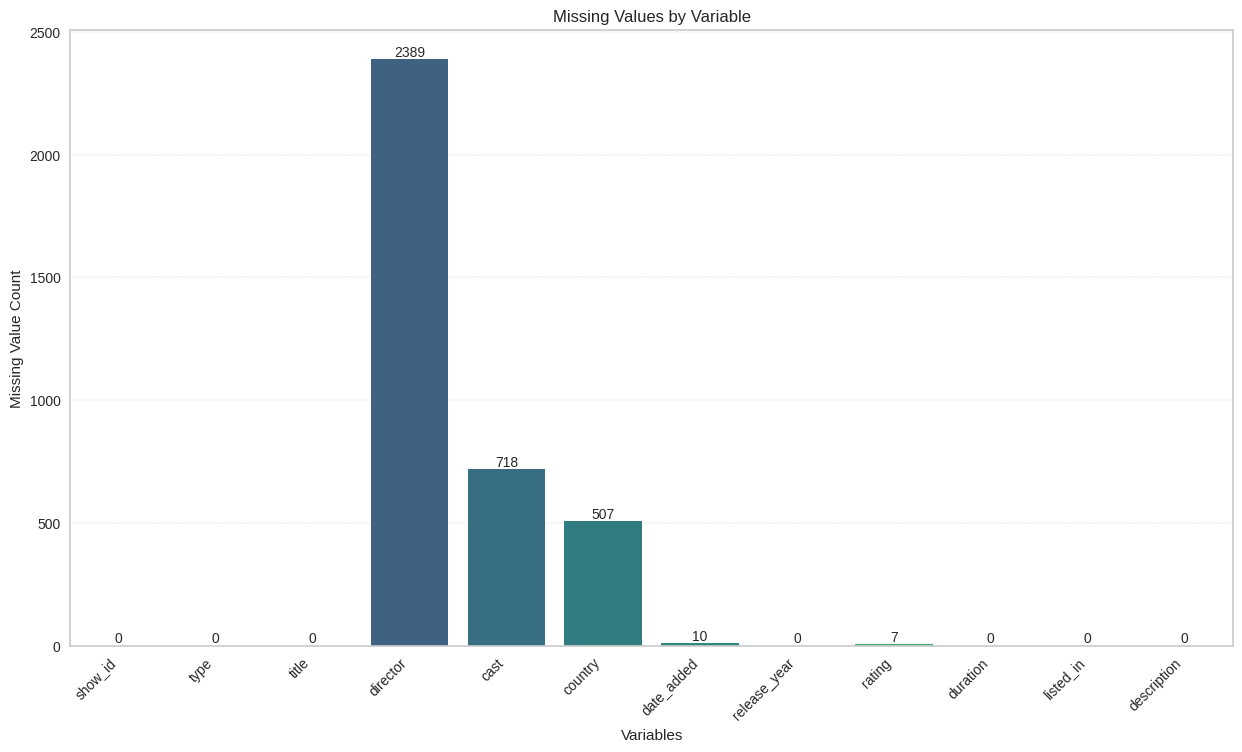

In [9]:
# Visualizing the missing values with a bar plot
plt.figure(figsize=(15, 8))
missing_values = df.isna().sum()

# Using a color gradient for better visualization
color_palette = sns.color_palette("viridis", len(df.columns))
plots = sns.barplot(x=missing_values.index, y=missing_values, palette=color_palette)

plt.title("Missing Values by Variable")
plt.xlabel("Variables")
plt.ylabel("Missing Value Count")

# Display the count of missing values on each bar
for i, val in enumerate(missing_values):
    plots.text(i, val, str(val), ha='center', va='bottom', size=10)

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', linewidth=0.3)
plt.show()


### What did you know about your dataset?


**The dataset "Netflix Movies and TV Shows Clustering" contains 12 columns, and only one column holds integer values. It's worth noting that there are no repeated entries, but there are some missing values in five columns: director, cast, country, date_added, and rating.***

**This dataset offers a great opportunity to delve into the patterns of movies and TV shows available on Netflix. Moreover, it serves as a valuable resource for building clustering models that group similar titles based on common features like genre, country of origin, and rating.**

**In simpler terms, the dataset lets us explore the trends in the diverse range of content on Netflix and allows us to create models that can organize similar shows and movies together based on shared characteristics such as their genre, where they're from, and their viewer ratings.**

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
print(f"Available columns:\n{df.columns.to_list()}")

Available columns:
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [11]:
# Dataset Describe
df.describe(include='all').T

count unique  \
show_id         7787   7787   
type            7787      2   
title           7787   7787   
director        5398   4049   
cast            7069   6831   
country         7280    681   
date_added      7777   1565   
release_year  7787.0    NaN   
rating          7780     14   
duration        7787    216   
listed_in       7787    492   
description     7787   7769   

                                                            top  freq  \
show_id                                                      s1     1   
type                                                      Movie  5377   
title                                                        3%     1   
director                                 Raúl Campos, Jan Suter    18   
cast                                         David Attenborough    18   
country                                           United States  2555   
date_added                                      January 1, 2020   118   
release_year                                                NaN   NaN   
rating                                                    TV-MA  2863   
duration                                               1 Season  1608   
listed_in                                         Documentaries   334   
description   Multiple women report their husbands as missin...     3   

                    mean       std     min     25%     50%     75%     max  
show_id              NaN       NaN     NaN     NaN     NaN     NaN     NaN  
type                 NaN       NaN     NaN     NaN     NaN     NaN     NaN  
title                NaN       NaN     NaN     NaN     NaN     NaN     NaN  
director             NaN       NaN     NaN     NaN     NaN     NaN     NaN  
cast                 NaN       NaN     NaN     NaN     NaN     NaN     NaN  
country              NaN       NaN     NaN     NaN     NaN     NaN     NaN  
date_added           NaN       NaN     NaN     NaN     NaN     NaN     NaN  
release_year  2013.93258  8.757395  1925.0  2013.0  2017.0  2018.0  2021.0  
rating               NaN       NaN     NaN     NaN     NaN     NaN     NaN  
duration             NaN       NaN     NaN     NaN     NaN     NaN     NaN  
listed_in            NaN       NaN     NaN     NaN     NaN     NaN     NaN  
description          NaN       NaN     NaN     NaN     NaN     NaN     NaN

### Variables Description

The variable description of the Netflix Movies and TV Shows Clustering Dataset is as follows:

1. **show_id**: Unique identifier for each movie/show.

2. **type**: Indicates whether the entry is a movie or a TV show.
3. **title**: Name of the movie or TV show.
4. **director**: Name of the director(s) of the movie or TV show.
5. **cast**: Names of the actors and actresses featured in the movie or TV show.
6. **country**: Country or countries where the movie or TV show was produced.
7. **date_added**: Date when the movie or TV show was added to Netflix.
8. **release_year**: Year when the movie or TV show was released.
9. **rating**: TV rating or movie rating of the movie or TV show.
10. **duration**: Length of the movie or TV show in minutes or seasons.
11. **listed_in**: Categories or genres of the movie or TV show.
12. **description**: Brief synopsis or summary of the movie or TV show.

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
print("Number of unique values in each column:")
print("-" * 40)

for column in df.columns:
    unique_count = df[column].nunique()
    print(f"{column}: {unique_count} unique values")

print("-" * 40)
print(f"Total number of rows in the DataFrame: {len(df)}")


Number of unique values in each column:
----------------------------------------
show_id: 7787 unique values
type: 2 unique values
title: 7787 unique values
director: 4049 unique values
cast: 6831 unique values
country: 681 unique values
date_added: 1565 unique values
release_year: 73 unique values
rating: 14 unique values
duration: 216 unique values
listed_in: 492 unique values
description: 7769 unique values
----------------------------------------
Total number of rows in the DataFrame: 7787


## 3. ***Data Wrangling***

### Data Wrangling Code

####1.  Handling Null values from each feature

In [13]:
## Imputing null value as per our discussion
# imputing with unknown in null values of director and cast feature
df[['director','cast']]=df[['director','cast']].fillna("Unknown")

# Imputing null values of country with Mode
df['country']=df['country'].fillna(df['country'].mode()[0])

# Dropping remaining null values of date_added and rating
df.dropna(axis=0, inplace=True)

In [14]:
# Display null value count and percentage for each variable
print("-" * 50)
print("Null value count and percentage in each variable:")
print("-" * 50)

# Null value count
null_count = df.isnull().sum()

# Percentage of null values
null_percentage = (null_count / len(df)) * 100

# Display results in a DataFrame
null_info = pd.DataFrame({
    "Null Count": null_count,
    "Percentage": null_percentage
})

print(null_info)
print("-" * 50)


--------------------------------------------------
Null value count and percentage in each variable:
--------------------------------------------------
              Null Count  Percentage
show_id                0         0.0
type                   0         0.0
title                  0         0.0
director               0         0.0
cast                   0         0.0
country                0         0.0
date_added             0         0.0
release_year           0         0.0
rating                 0         0.0
duration               0         0.0
listed_in              0         0.0
description            0         0.0
--------------------------------------------------


####2.  Handling nested columns i.e 'director', 'cast', 'listed_in' and 'country'

In [15]:
# Let's create a copy of dataframe and unnest the original one
df_new= df.copy()

In [16]:
# Unnesting 'Directors' column
dir_constraint=df['director'].apply(lambda x: str(x).split(', ')).tolist()
df1 = pd.DataFrame(dir_constraint, index = df['title'])
df1 = df1.stack()
df1 = pd.DataFrame(df1.reset_index())
df1.rename(columns={0:'Directors'},inplace=True)
df1 = df1.drop(['level_1'],axis=1)
df1.sample(10)

title        Directors
5012                                  One More Time          Unknown
1140                                    Born Strong     Ross Hockrow
4567                               Motor Mitraan Di      Amitoj Mann
188   A Glimpse Inside the Mind of Charles Swan III    Roman Coppola
5776                              Saheb Bibi Golaam  Pratim D. Gupta
5196                                   Penalty Kick   Rodrigo Triana
5158                                 Part-Time Idol          Unknown
2834                                     Haraamkhor     Shlok Sharma
3540                                        Kahaani      Sujoy Ghosh
5754                                       S.W.A.T.    Clark Johnson

In [17]:
# Unnesting 'cast' column
cast_constraint=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df2 = pd.DataFrame(cast_constraint, index = df['title'])
df2 = df2.stack()
df2 = pd.DataFrame(df2.reset_index())
df2.rename(columns={0:'Actors'},inplace=True)
df2 = df2.drop(['level_1'],axis=1)
df2.sample(10)

title            Actors
7128               Black Mirror    Brenna Harding
43346                    Teshan     Virast Sandhu
47412  The Last Thing He Wanted      Onata Aprile
1846     A Tale of Two Kitchens           Unknown
37086                   Revenge   Lalita Panyopas
15918                 Fireworks  Mitsuru Miyamoto
12180                Dear Santa  Brooklynn Proulx
12927                Dilan 1990     Brandon Salim
45930       The Garden of Words        Megumi Han
33368         Operation Red Sea          Hai Qing

In [18]:
# Unnesting 'listed_in' column
listed_constraint=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df3 = pd.DataFrame(listed_constraint, index = df['title'])
df3 = df3.stack()
df3 = pd.DataFrame(df3.reset_index())
df3.rename(columns={0:'Genre'},inplace=True)
df3 = df3.drop(['level_1'],axis=1)
df3.sample(10)



title                      Genre
16617                   White Gold                TV Comedies
9065                    Miss Julie                     Dramas
3758                     Detention     International TV Shows
11769                  Santa Claws                   Comedies
15265            The Vatican Tapes                  Thrillers
5369                        Goedam               TV Mysteries
1116              Angamaly Diaries         Action & Adventure
16942  Yours Sincerely, Kanan Gill            Stand-Up Comedy
7623                       La Niña  Spanish-Language TV Shows
4515     Examination of Conscience                 Docuseries

In [19]:
# Unnesting 'country' column
country_constraint=df['country'].apply(lambda x: str(x).split(', ')).tolist()
df4 = pd.DataFrame(country_constraint, index = df['title'])
df4 = df4.stack()
df4 = pd.DataFrame(df4.reset_index())
df4.rename(columns={0:'Country'},inplace=True)
df4 = df4.drop(['level_1'],axis=1)
df4.sample(10)

title         Country
8523      The Twins Effect II           China
2477         Estar o no estar          Mexico
708          Arthur Christmas  United Kingdom
5032                  MONKART   United States
532        Amar Akbar Anthony           India
1595             Chelsea Does   United States
6200    Reggie Watts: Spatial   United States
6430                     Safe  United Kingdom
800                     Babel          France
5172  Muzaffarnagar Baaqi Hai           India

**Great, we have sucessfully separated the nested columns. Now let's just merge all the created dataframe into the single merged dataframe.**

## Merging all the unnested dataframes

In [20]:
## Merging all the unnested dataframes
# Merging director and cast
df5 = df2.merge(df1,on=['title'],how='inner')

# Merging listed_in with merged of (director and cast)
df6 = df5.merge(df3,on=['title'],how='inner')

# Merging country with merged of [listed_in with merged of (director and cast)]
df7 = df6.merge(df4,on=['title'],how='inner')

# Head of final merged dataframe
df7.head()

title            Actors Directors                   Genre Country
0    3%       João Miguel   Unknown  International TV Shows  Brazil
1    3%       João Miguel   Unknown               TV Dramas  Brazil
2    3%       João Miguel   Unknown     TV Sci-Fi & Fantasy  Brazil
3    3%  Bianca Comparato   Unknown  International TV Shows  Brazil
4    3%  Bianca Comparato   Unknown               TV Dramas  Brazil

Cool, now let's merge this dataframe with the original one on the left join to avoid information loss.

In [21]:
# Merging unnested data with the created dataframe in order to make the final dataframe
df = df7.merge(df[['type', 'title', 'date_added', 'release_year', 'rating', 'duration','description']],on=['title'],how='left')
df.head()

title            Actors Directors                   Genre Country     type  \
0    3%       João Miguel   Unknown  International TV Shows  Brazil  TV Show   
1    3%       João Miguel   Unknown               TV Dramas  Brazil  TV Show   
2    3%       João Miguel   Unknown     TV Sci-Fi & Fantasy  Brazil  TV Show   
3    3%  Bianca Comparato   Unknown  International TV Shows  Brazil  TV Show   
4    3%  Bianca Comparato   Unknown               TV Dramas  Brazil  TV Show   

        date_added  release_year rating   duration  \
0  August 14, 2020          2020  TV-MA  4 Seasons   
1  August 14, 2020          2020  TV-MA  4 Seasons   
2  August 14, 2020          2020  TV-MA  4 Seasons   
3  August 14, 2020          2020  TV-MA  4 Seasons   
4  August 14, 2020          2020  TV-MA  4 Seasons   

                                         description  
0  In a future where the elite inhabit an island ...  
1  In a future where the elite inhabit an island ...  
2  In a future where the elite inhabit an island ...  
3  In a future where the elite inhabit an island ...  
4  In a future where the elite inhabit an island ...

#### 3. Typecasting of attributes

In [22]:
# Checking info of the dataset before typecasting
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175807 entries, 0 to 175806
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         175807 non-null  object
 1   Actors        175807 non-null  object
 2   Directors     175807 non-null  object
 3   Genre         175807 non-null  object
 4   Country       175807 non-null  object
 5   type          175807 non-null  object
 6   date_added    175807 non-null  object
 7   release_year  175807 non-null  int64 
 8   rating        175807 non-null  object
 9   duration      175807 non-null  object
 10  description   175807 non-null  object
dtypes: int64(1), object(10)
memory usage: 16.1+ MB


In [23]:
# Typecasting duration into integer by removing 'min' and 'season' from the end
df['duration']= df['duration'].apply(lambda x: int(x.split()[0]))

# Typecasting string object to datetime object of date_added column
df['date_added']= pd.to_datetime(df['date_added'])

# Extracting date, day, month and year from date_added column
df["day_added"]= df["date_added"].dt.day
df["month_added"]= df["date_added"].dt.month
df["year_added"]= df["date_added"].dt.year

# Dropping date_added
df.drop('date_added', axis=1, inplace=True)

In [24]:
# Checking info of the dataset after typecasting
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175807 entries, 0 to 175806
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         175807 non-null  object
 1   Actors        175807 non-null  object
 2   Directors     175807 non-null  object
 3   Genre         175807 non-null  object
 4   Country       175807 non-null  object
 5   type          175807 non-null  object
 6   release_year  175807 non-null  int64 
 7   rating        175807 non-null  object
 8   duration      175807 non-null  int64 
 9   description   175807 non-null  object
 10  day_added     175807 non-null  int64 
 11  month_added   175807 non-null  int64 
 12  year_added    175807 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 18.8+ MB


In [25]:
#checking unique value in rating column
unique_ratings = df['rating'].unique()
print("Unique values in the 'rating' column:")
print(unique_ratings)


Unique values in the 'rating' column:
['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' 'TV-Y7' 'PG' 'G'
 'NC-17' 'TV-Y7-FV' 'UR']


#### 4. Binning of Rating attribute

Adult Content: This type of content is designed for mature audiences and may include strong language, violence, nudity, and explicit material. Think of it as content suitable for adults, similar to what you might find in movies rated TV-MA, NC-17, or R.

Children Content: Created with younger audiences in mind, this category is safe for all ages. While it may have mild elements like violence or suggestive content, it's generally suitable for children. Think of it as content similar to what you might find in shows rated TV-PG, PG, TV-G, or G.

Teen Content: Geared towards teenagers, this content may contain moderate elements like violence, mild language, and suggestive content. Think of it as content akin to movies rated PG-13 or shows rated TV-14.

Family-friendly Content: Tailored for family viewing, this category is suitable for children and may include fantasy violence. Think of it as content similar to what you'd find in shows rated TV-Y, TV-Y7, or TV-Y7-FV.

Not Rated: This type of content hasn't been rated by a rating board, and it may contain material that's not suitable for all audiences. It's like content labeled NR or UR.

**Let's not complicate it and create bins as following:**
* **Adult Content**: TV-MA, NC-17, R
* **Children Content**:  TV-PG, PG, TV-G, G
* **Teen Content**: PG-13, TV-14
* **Family-friendly Content**: TV-Y, TV-Y7, TV-Y7-FV
* **Not Rated**: NR, UR

In [26]:
# Binning the values in the rating column
rating_map = {'TV-MA':'Adult Content',
              'R':'Adult Content',
              'PG-13':'Teen Content',
              'TV-14':'Teen Content',
              'TV-PG':'Children Content',
              'NR':'Not Rated',
              'TV-G':'Children Content',
              'TV-Y':'Family-friendly Content',
              'TV-Y7':'Family-friendly Content',
              'PG':'Children Content',
              'G':'Children Content',
              'NC-17':'Adult Content',
              'TV-Y7-FV':'Family-friendly Content',
              'UR':'Not Rated'}

df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

array(['Adult Content', 'Teen Content', 'Children Content', 'Not Rated',
       'Family-friendly Content'], dtype=object)

In [27]:
#checking unique value in rating column
unique_ratings = df['rating'].unique()
print("Unique values in the 'rating' column:")
print(unique_ratings)

Unique values in the 'rating' column:
['Adult Content' 'Teen Content' 'Children Content' 'Not Rated'
 'Family-friendly Content']


#### 5. Separating Movies and TV Shows

In [28]:
# Spearating the dataframes for further analysis
df_movies= df[df['type']== 'Movie']
df_tvshows= df[df['type']== 'TV Show']

# Printing the shape
print(df_movies.shape, df_tvshows.shape)

(126079, 13) (49728, 13)


### What all manipulations have you done and insights you found?

Handling Null Values:

Imputed 'director' and 'cast' with 'Unknown'.
Imputed 'country' with the mode.
Dropped null values of 'date_added' and 'rating' (based on a low percentage).

Unnesting Values:

Unnested values from the 'director', 'cast', 'listed_in', and 'country' columns, storing them in separate DataFrames.
Merged all the unnested DataFrames with the original one using a left join to isolate the values of each feature.

Typecasting:

Typecasted 'duration' into an integer (removing 'min' and 'seasons' from the values).
Typecasted 'date_added' to datetime format.

Feature Extraction:

Extracted 'date', 'month', and 'year' from 'date_added'.


Rating Categorization:

Created five bins for the 'rating' column based on content appropriateness for different age groups: Adult, Restricted, Teen, All Ages, and Not Rated.

Data Splitting:

Split the dataframe into two separate DataFrames, 'df_movies' (containing only Movies) and 'df_tvshows' (containing only TV Shows).

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Percentage of total number of Movies and TV Shows over Netflix

In [29]:
import plotly.graph_objects as go

# Data
labels = ['TV Show', 'Movie']
values = [df['type'].value_counts()['TV Show'], df['type'].value_counts()['Movie']]

# Calculate percentages
total = sum(values)
percentages = [(value / total) * 100 for value in values]

# Colors
colors = ['#ffd700', '#008000']

# Create bar chart
fig = go.Figure(data=[go.Bar(x=labels, y=values, text=percentages, textposition='auto', marker_color=colors)])

# Customize layout
fig.update_layout(
    title_text='Type of Content on Netflix',
    title_x=0.5,
    height=500,
    width=500,
    xaxis_title='Type of Content',
    yaxis_title='Count',
    legend=dict(x=0.9),
)

# Show plot
fig.show()


##### 1. Why did you pick the specific chart?

The bar chart was chosen because it offers a straightforward way to compare the number of TV shows and movies on Netflix. This visual representation makes it easy to grasp the distribution. By including percentages, we aimed to provide a clearer insight into the proportion of each category, adding an extra layer of understanding.

##### 2. What is/are the insight(s) found from the chart?

1.Netflix's content is predominantly made up of movies, constituting about two-thirds (67.7%) of the total offerings. The remaining one-third is dedicated to TV shows.

2.Looking at the dataset, it's evident that TV shows represent a minority, comprising only 28.3% of the content, while the majority—71.7%—consists of movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact**

**Richer Content Library:** Netflix can enrich its content library by investing more in popular movies and exclusive movie content based on user preferences.

**Enhanced User Experience:** Understanding that users prefer movies allows Netflix to improve recommendations, user interfaces, and marketing strategies for a more engaging movie-centric experience.

**Monetization Opportunities:** Knowing the popularity of movies can guide Netflix in exploring partnerships, promotions, and advertising models specific to movie content for increased revenue.

**Negative Impact:**

**Risk of Neglecting TV Shows:** Overlooking the TV show segment, even with a movie preference, may lead to a decline in subscriber retention or acquisition.

**Competitive Disadvantage:** Neglecting TV shows may create a competitive disadvantage against platforms offering a diverse content mix, impacting Netflix's competitiveness.

**Limited Audience Appeal:** Heavy investment in movies may limit Netflix's appeal to a specific demographic, emphasizing the importance of diversifying content for a broader audience reach.

#### Chart - 2

How content is distributed over Netflix?

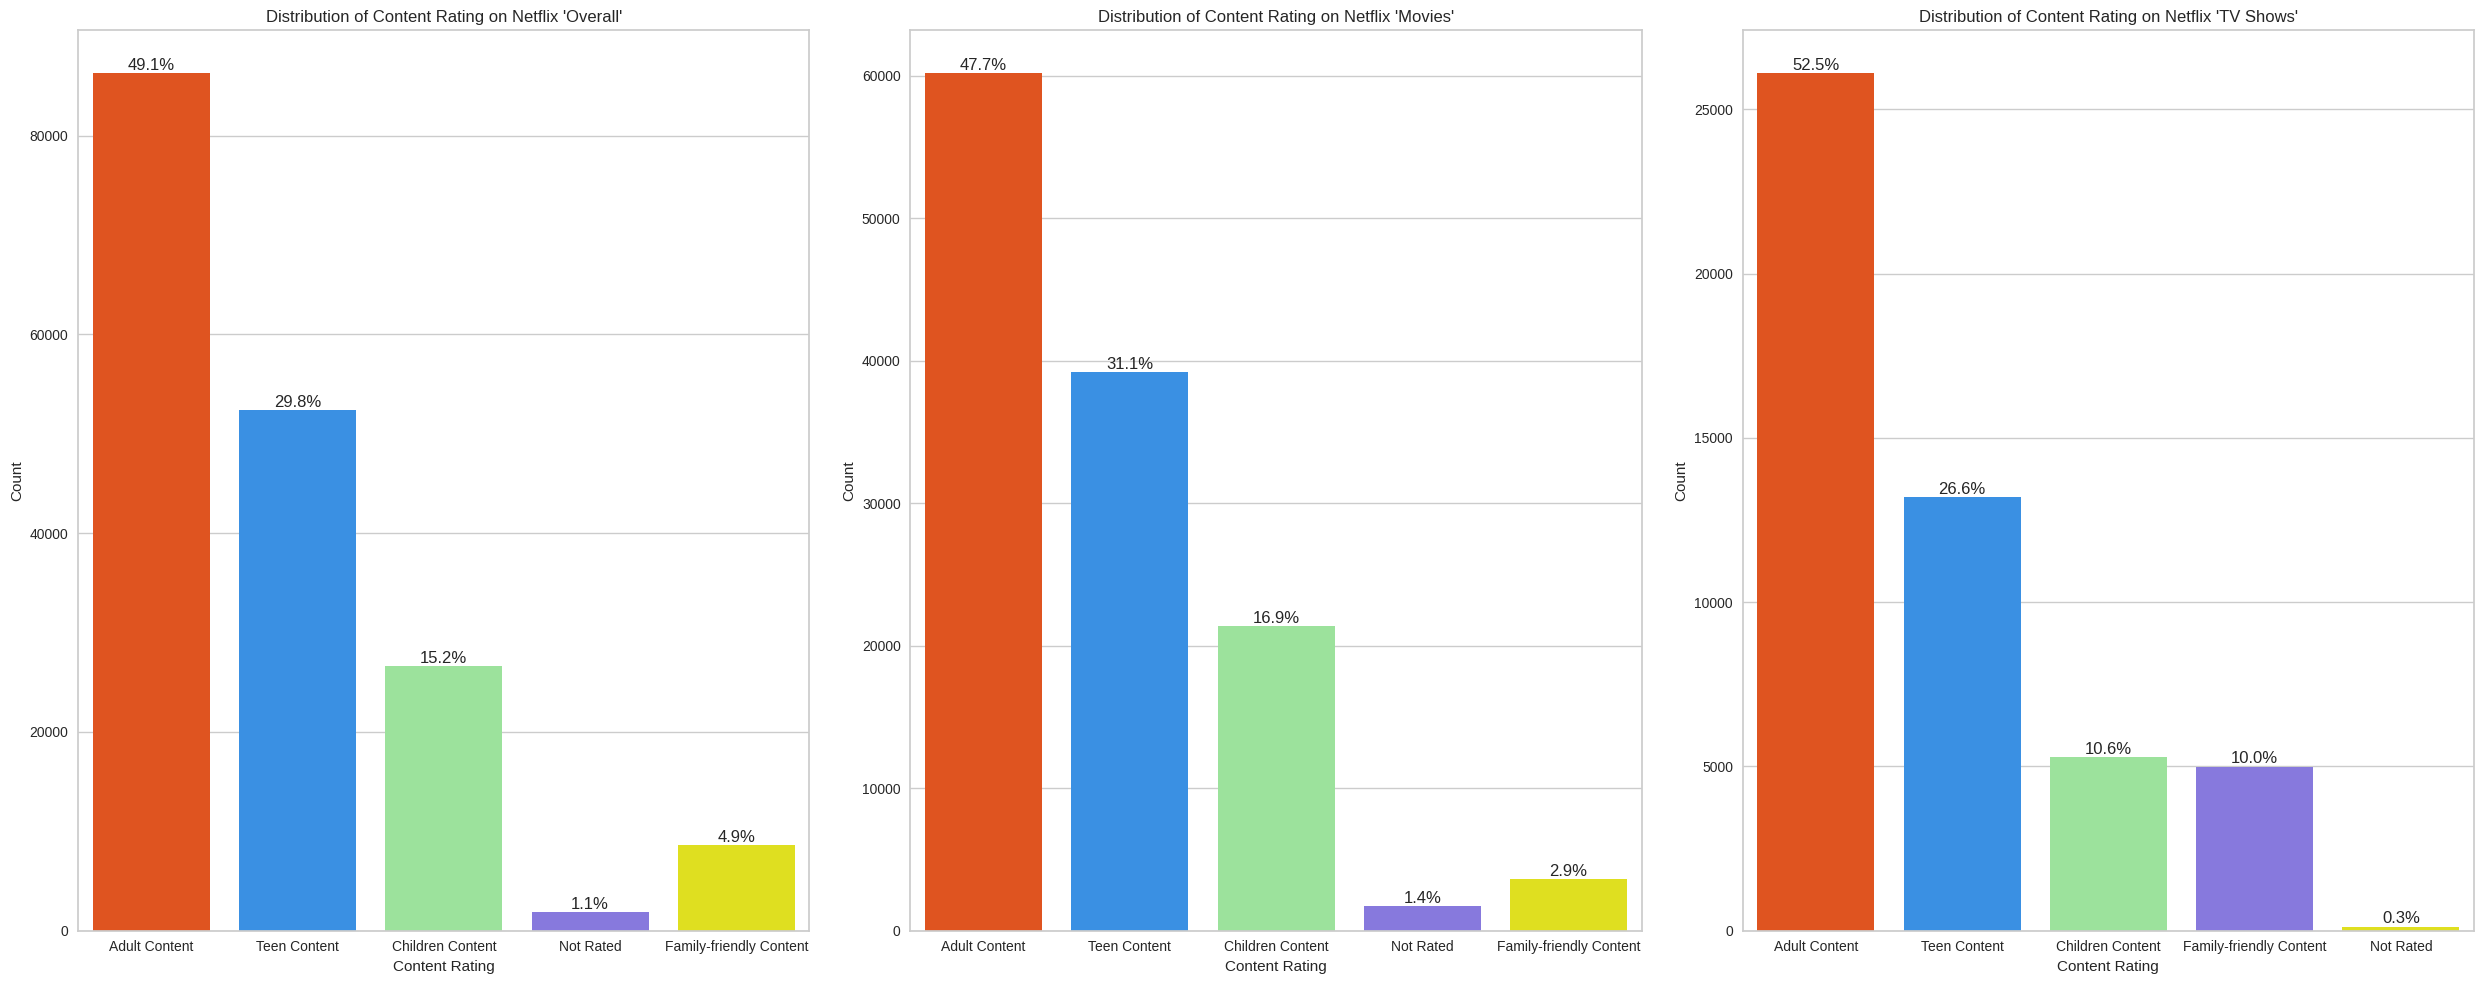

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 10))

# Set the color palette
colors = ['orangered', 'dodgerblue', 'lightgreen', 'mediumslateblue', 'yellow']

for i, (data, title) in enumerate(zip([df, df_movies, df_tvshows], ['Overall', 'Movies', 'TV Shows'])):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x='rating', data=data, palette=colors)

    total = len(data['rating'])
    for p in plt.gca().patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        plt.text(x, y + 5, percentage, ha='center', va='bottom')

    plt.title(f"Distribution of Content Rating on Netflix '{title}'")
    plt.xlabel('Content Rating')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Horizontal bar chart to showcase the distribution of content ratings, making it easy to compare and understand. By including percentages atop each bar, we aim to provide a clear picture of the relative proportions of each content rating, enhancing the overall readability and insight into the data.

##### 2. What is/are the insight(s) found from the chart?

1.We discovered that the majority of content on Netflix falls into the Adult and Teen categories.

2.Additionally, a noteworthy observation is that there is less family-friendly content available in the Movies section compared to TV Shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


1.To maximize our gains, it would be beneficial for the production house to place a greater emphasis on creating content that appeals to the Teen and Adult audience.

2.The Family-friendly TV Shows category holds promising opportunities for growth and should be a focus area for development.

#### Chart - 3 (Who are the top actors performing in Movies and TV Shows?)

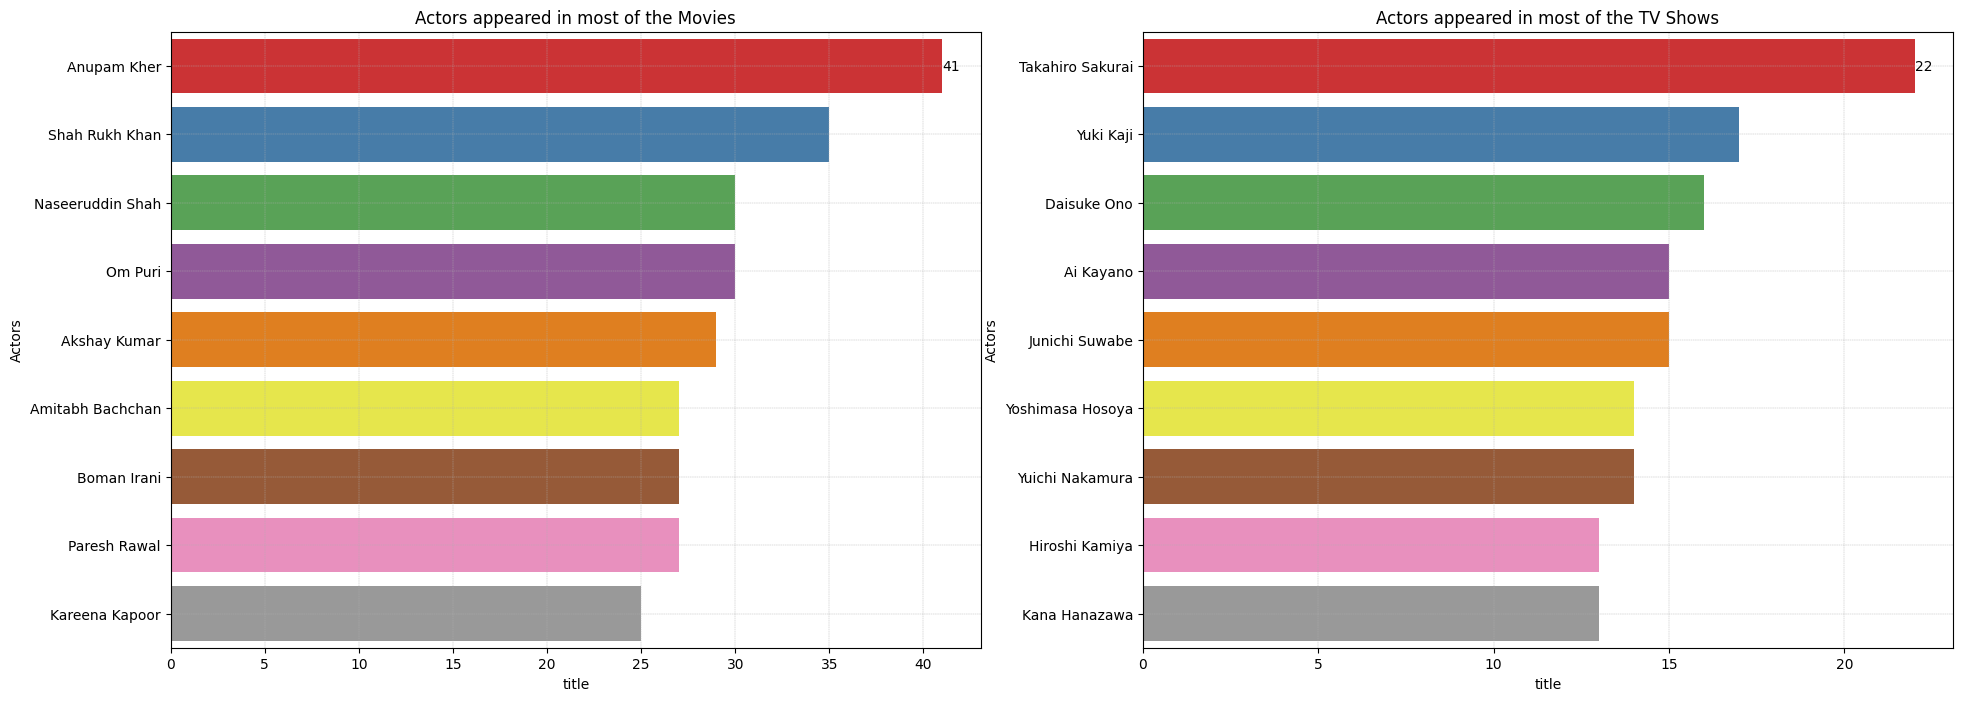

In [31]:
# Top 10 casts in Movies and TV Shows
plt.style.use('default')
plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_actor = i.groupby(['Actors']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[1:10]
  plots= sns.barplot(y = "Actors",x = 'title', data = df_actor, palette='Set1')
  plt.title(f'Actors appeared in most of the {j}')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

To know which actors are more popular on Netflix.

##### 2. What is/are the insight(s) found from the chart?

1. We found an interesting insight that **most of the Actors in Movies are from INDIA.**

2. No popular actors from india in TV Shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Indians are movie lover, they love to watch movies hence business should target indian audience for Movies.

#### Chart - 4 (Who are the top Directors directing Movies and TV Shows?)

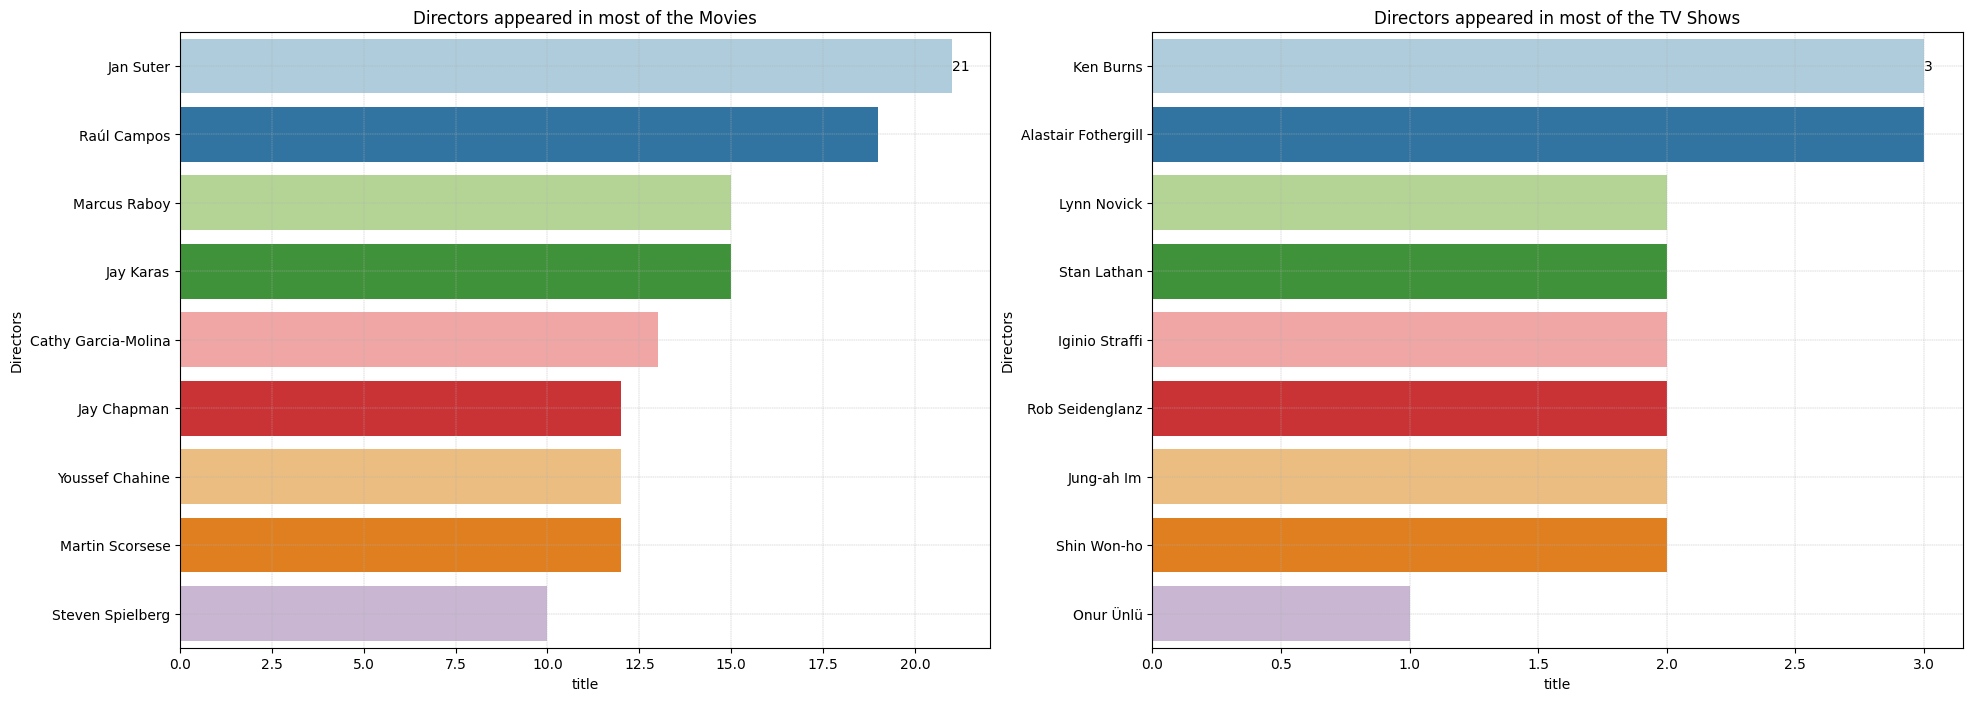

In [32]:
# Top 10 Directors in Movies and TV Shows
plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_director = i.groupby(['Directors']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[1:10]
  plots= sns.barplot(y = "Directors",x = 'title', data = df_director, palette='Paired')
  plt.title(f'Directors appeared in most of the {j}')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

To know which director is popular in Movies and which one is popular in TV Shows.

##### 2. What is/are the insight(s) found from the chart?

1. We found that most of the movies directed by **jan suter**.

2. Most TV shows directed by **ken burns**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Movie/tvshows producers can select the popular director for their upcoming projects

#### Chart - 5 (What are the top 10 Countries involved in content creation?)

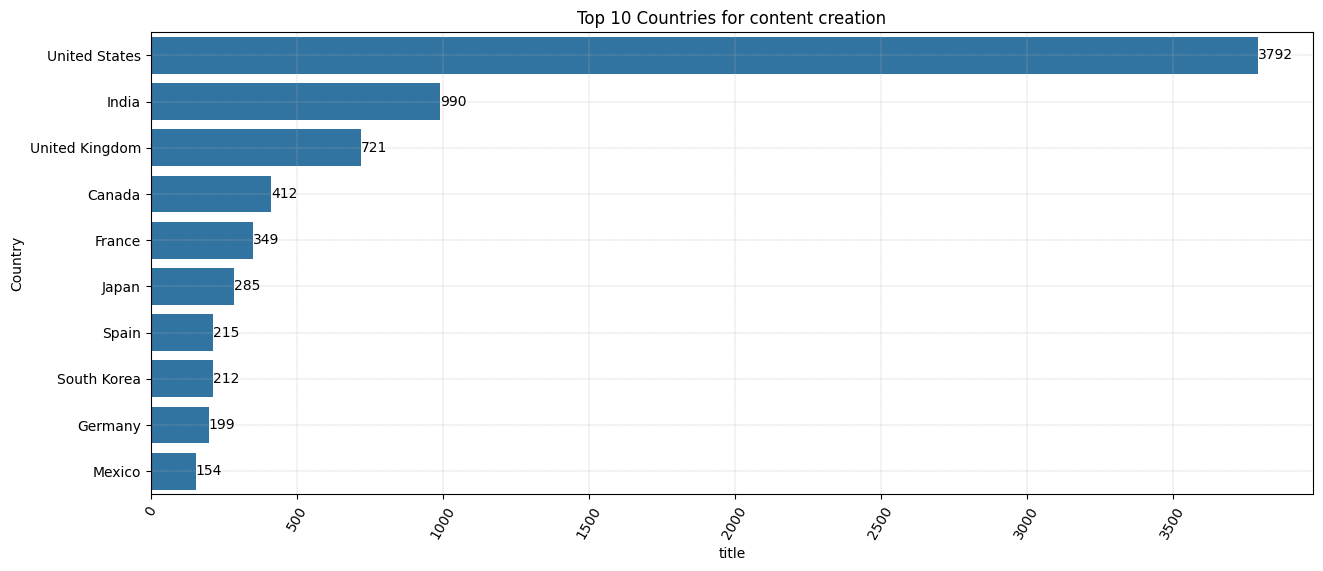

In [33]:
df_country = df.groupby(['Country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,6))
plots= sns.barplot(y = "Country",x = 'title', data = df_country)
plt.xticks(rotation = 60)
plt.title('Top 10 Countries for content creation')
plt.grid(linestyle='--', linewidth=0.3)
plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

To know which country produces Maximum number of TV Shows and Movies.

##### 2. What is/are the insight(s) found from the chart?

1.Netflix primarily features content from the United States, making it a major hub for American movies and TV shows.

2.Bollywood movies from India have gained significant traction on Netflix, positioning India as the second-largest producer of movies on the platform.

3.The dataset highlights a diverse array of content on Netflix, with notable contributions from countries like Canada, France, and Japan, showcasing a rich variety of global entertainment.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The knowledge we've acquired could really benefit Netflix's business. It opens up exciting possibilities for growth and expansion. For instance, we could focus on investing in a mix of American and Bollywood content, catering to a broader audience. Additionally, considering the appetite for diversity, acquiring a wider range of content could be a strategic move, enhancing the overall appeal and engagement for Netflix users.

#### Chart - 6 (Which Countries has the highest spread of Movies and TV Shows over Netflix)

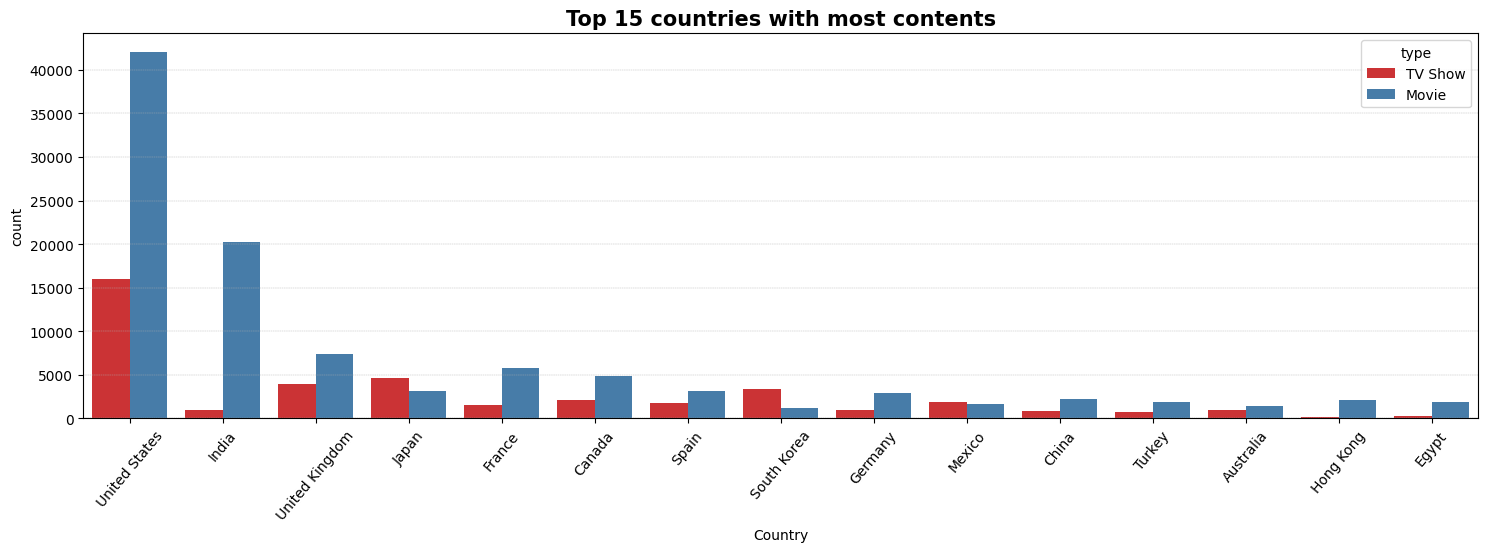

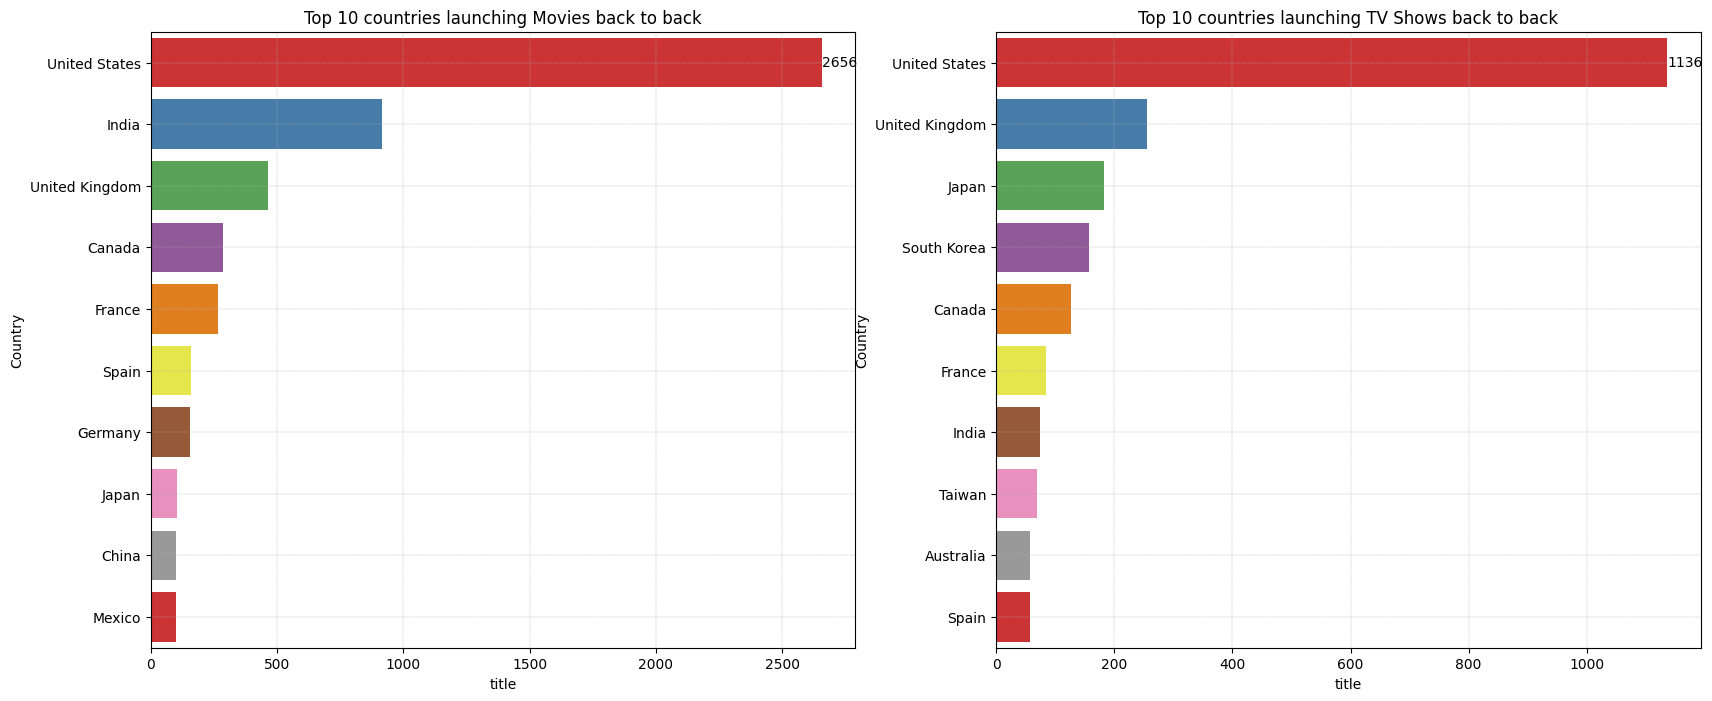

In [34]:
#Analysing top15 countries with most content
plt.figure(figsize=(18,5))
plt.grid(linestyle='--', linewidth=0.3)
sns.countplot(x=df['Country'],order=df['Country'].value_counts().index[0:15],hue=df['type'],palette ="Set1")
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

plt.figure(figsize=(20,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_country = i.groupby(['Country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
  plots= sns.barplot(y = "Country",x = 'title', data = df_country, palette='Set1')
  plt.title(f'Top 10 countries launching {j} back to back')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

To know which country produces which type of content the most.

##### 2. What is/are the insight(s) found from the chart?

1.Movies Take Center Stage in India's Entertainment Scene:

India stands out as a cinematic powerhouse, producing a prolific number of movies, overshadowing the quantity of TV shows.

2.Japan and South Korea Lead the Small Screen:

In the world of entertainment, Japan and South Korea shine as prolific creators of TV shows, outpacing their production of movies.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding what people like to watch in different countries can help Netflix grow. For example, if people in India enjoy movies, Netflix could make more Indian movies. If people in Japan and South Korea like certain types of TV shows, Netflix could create more shows like that. This way, Netflix can give people what they want to watch, and it can make its business even bette

#### Chart - 7 (Which Genres are Popular in Netflix)

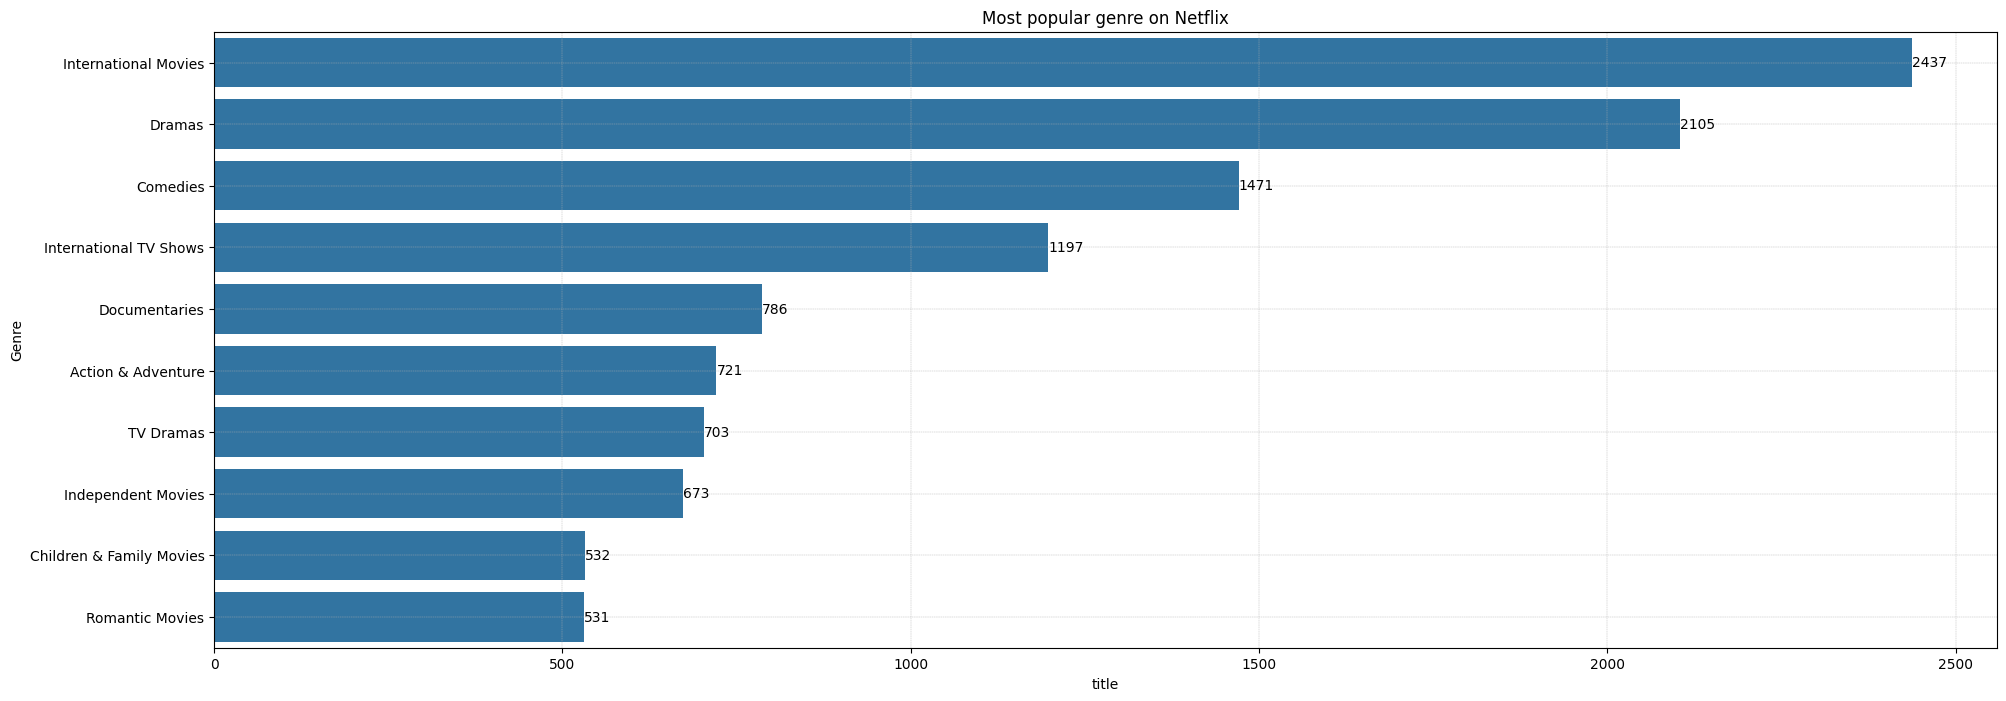

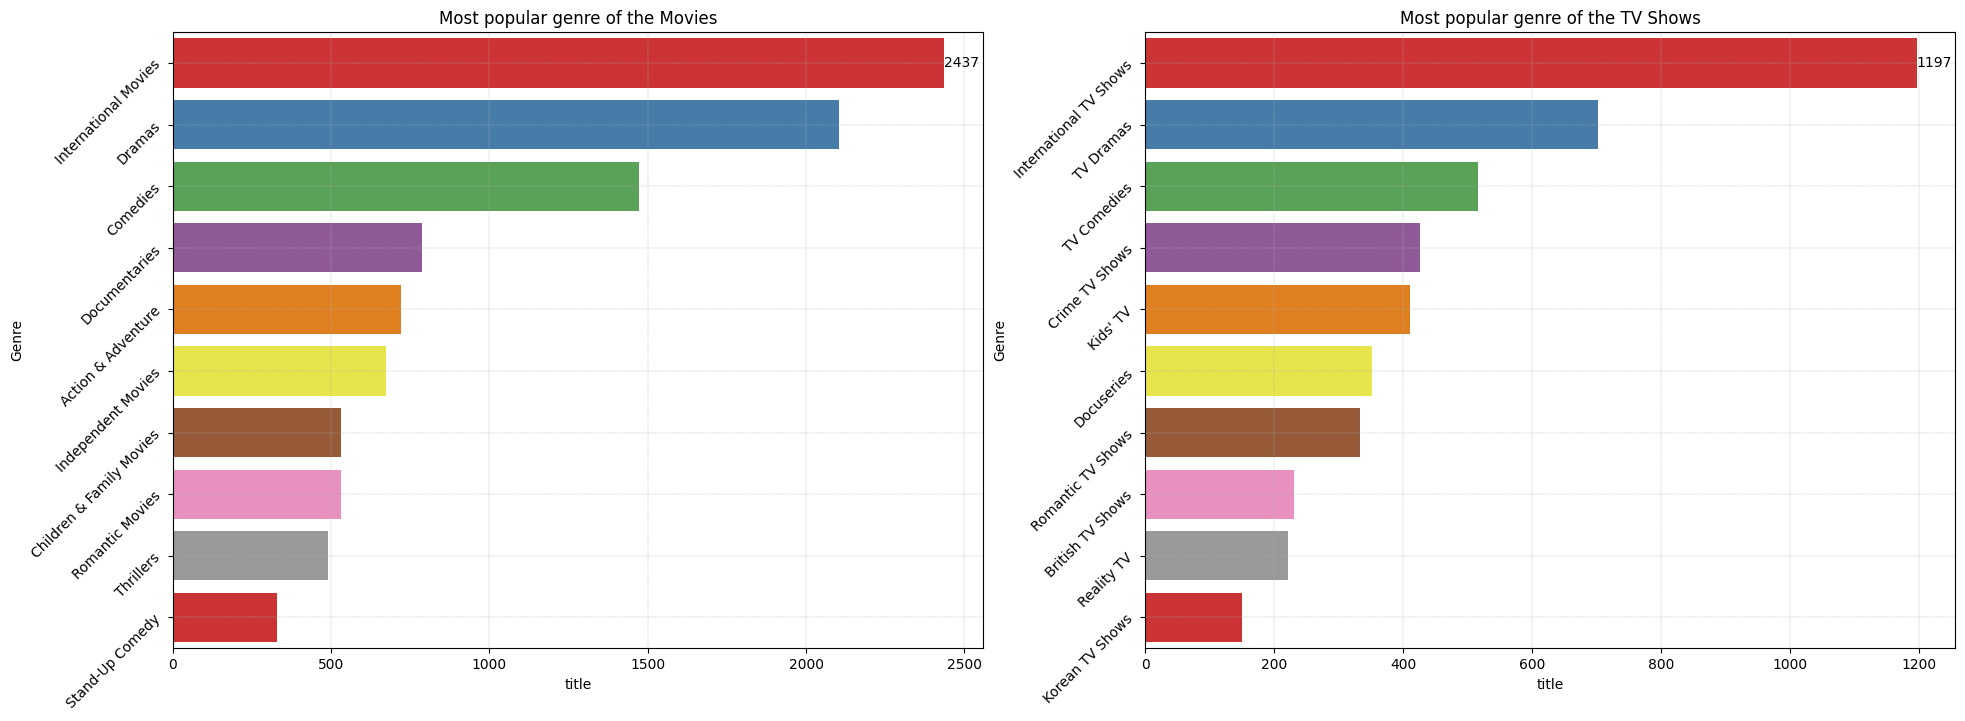

In [35]:
plt.figure(figsize=(23,8))
df_genre = df.groupby(['Genre']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plots= sns.barplot(y = "Genre",x = 'title', data = df_genre)
plt.title(f'Most popular genre on Netflix')
plt.grid(linestyle='--', linewidth=0.3)
plots.bar_label(plots.containers[0])
plt.show()

plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_genre = i.groupby(['Genre']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
  plots= sns.barplot(y = "Genre",x = 'title', data = df_genre, palette='Set1')
  plt.title(f'Most popular genre of the {j}')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
  plt.yticks(rotation = 45)
plt.show()

##### 1. Why did you pick the specific chart?

This graph tells us which genre is most popular in Netflix.

##### 2. What is/are the insight(s) found from the chart?

1. **International movies genre is most popular** in both the TV Shows and Movies category. Followed by **Drama** and **comedy**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained can have a positive impact on Netflix's business by helping the platform understand what genres and types of content are popular with its audience. This information can help Netflix tailor its content acquisition and production strategies to better cater to the preferences of its viewers, which can lead to increased engagement and customer satisfaction.

#### Chart - 8 (Total number of Movies/TV Shows released and added per year on Netflix?)

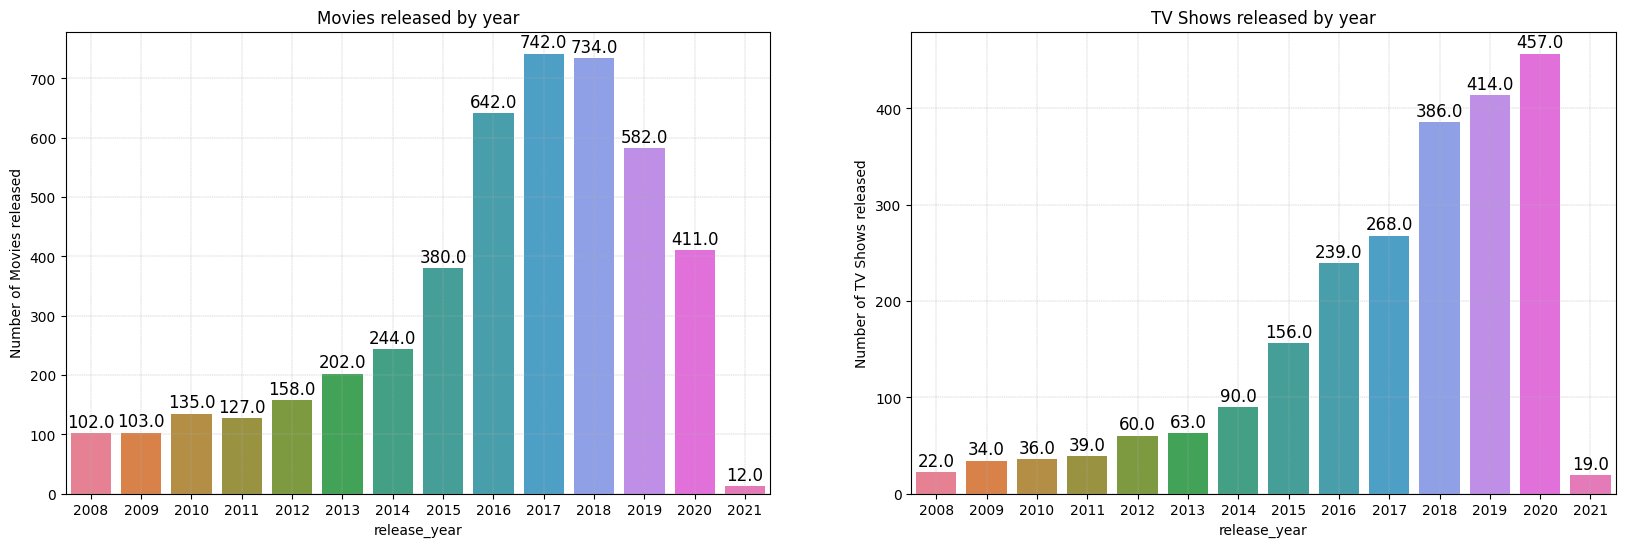

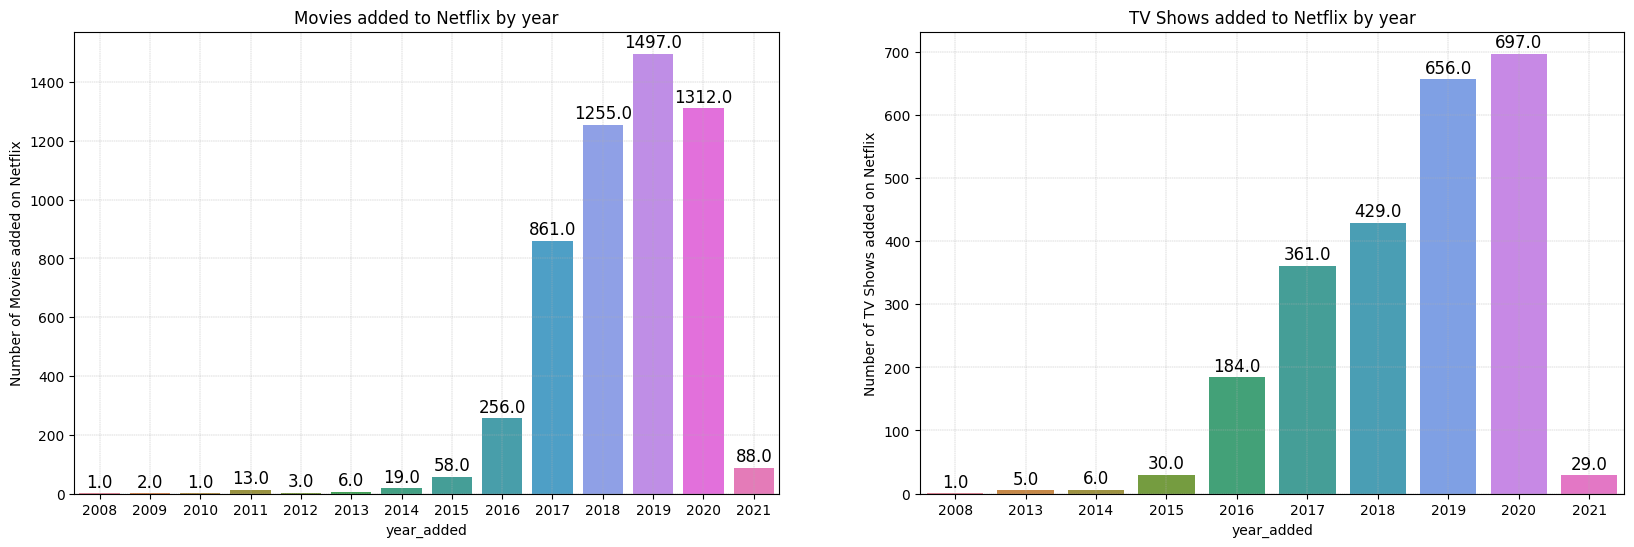

In [36]:
plt.figure(figsize=(20,6))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_release_year = i.groupby(['release_year']).agg({'title':'nunique'}).reset_index().sort_values(by=['release_year'],ascending=False)[:14]
  plots= sns.barplot(x = 'release_year',y= 'title', data = df_release_year, palette='husl')
  plt.title(f'{j} released by year')
  plt.ylabel(f"Number of {j} released")
  plt.grid(linestyle='--', linewidth=0.3)

  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')
plt.show()

plt.figure(figsize=(20,6))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_country = i.groupby(['year_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['year_added'],ascending=False)
  plots= sns.barplot(x = 'year_added',y= 'title', data = df_country, palette='husl')
  plt.title(f'{j} added to Netflix by year')
  plt.ylabel(f"Number of {j} added on Netflix")
  plt.grid(linestyle='--', linewidth=0.3)

  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

This graph shows us how many  movies and TV Show released and added in a year on Netflix.

##### 2. What is/are the insight(s) found from the chart?

We can see that the **number of movies and TV shows added on Netflix has been increasing steadily every year.** But **since 2018, the number of Movies released on Netflix has been lowered and the number of TV shows released has been significantly increased.** In terms of movies and TV Shows addition, in 2020 Number of movies added as compared to 2019 were vey less and on the other side number of TV Shows were more as compare to 2019.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that the number of movies added has decreased since 2018 while the number of TV shows added has significantly increased could potentially lead to negative growth for Netflix. This could be due to various reasons such as changing consumer preferences, increased competition from other streaming services, and higher production costs associated with creating movies.

To mitigate the potential negative impact, Netflix could explore strategies to diversify its content offerings and adapt to changing consumer preferences. This could include investing in a mix of movies, TV shows, and other forms of original content such as documentaries, limited series, and stand-up comedy specials. By diversifying its content offerings, Netflix can attract a wider audience and maintain its relevance in the ever-evolving streaming landscape.





#### Chart - 9 (Total Number of Movies/TV Shows added per month on Netflix)

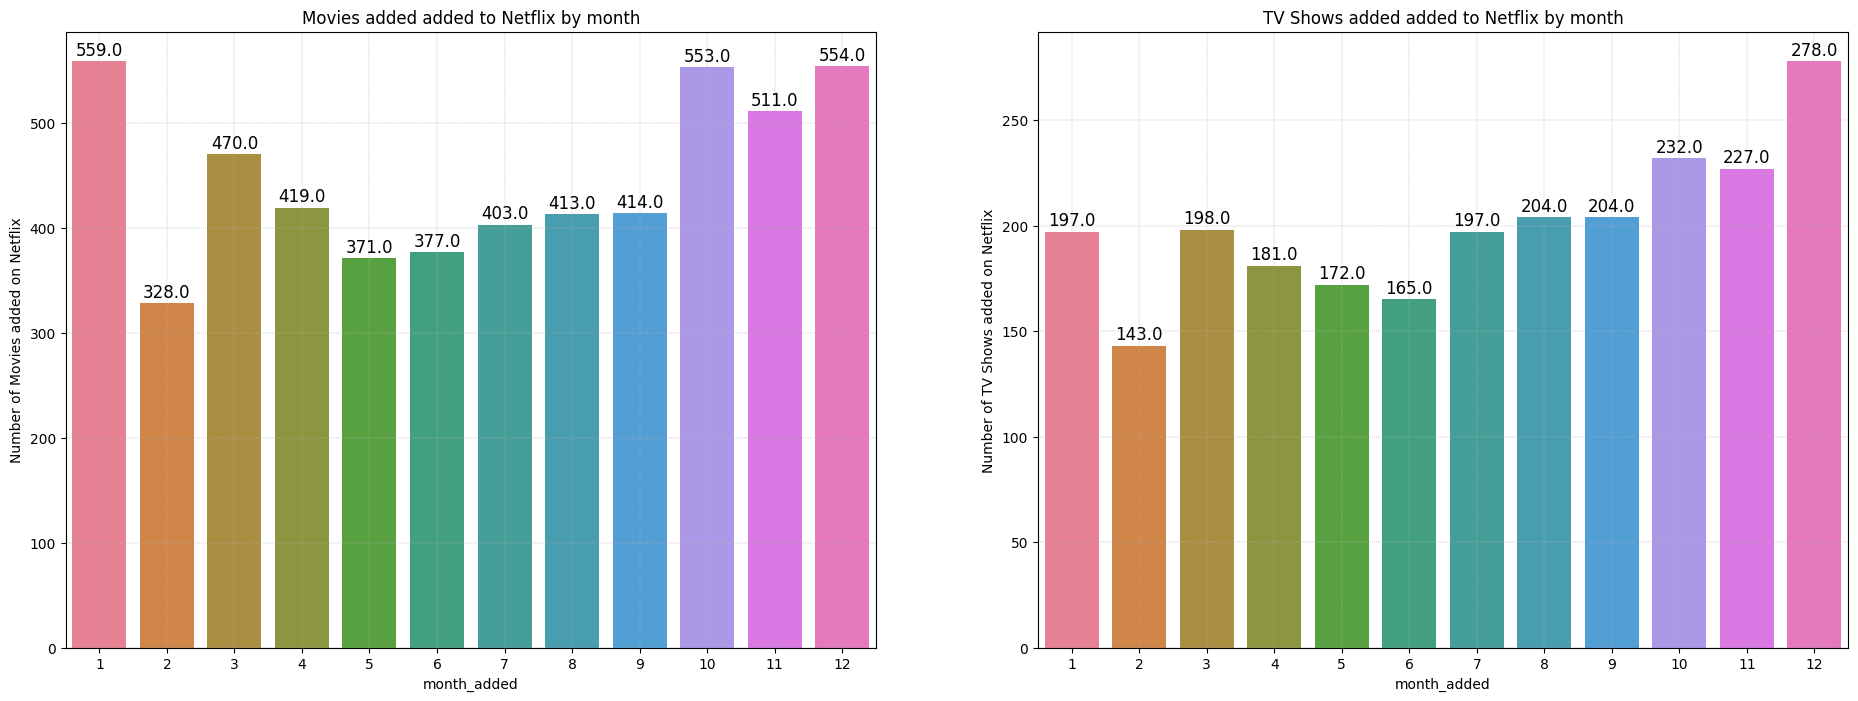

In [37]:
plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_month = i.groupby(['month_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['month_added'],ascending=False)
  plots= sns.barplot(x = 'month_added',y='title', data = df_month, palette='husl')
  plt.title(f'{j} added added to Netflix by month')
  plt.ylabel(f"Number of {j} added on Netflix")
  plt.grid(linestyle='--', linewidth=0.3)
  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

We have plotted this graph to know in which month the movie/tv shows added is **maximum** and in which year **minimum**.

##### 2. What is/are the insight(s) found from the chart?

1. We found that **October, November and December are the most popular months for TV shows addition**.

2. **January, October and December are the most popular months for movie addition**.

3. February is the least popular month for the movies and TV shows to be added on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained can help Netflix create a positive business impact by identifying the most popular months for new content additions. This can help Netflix plan content releases during peak periods, leading to increased user engagement and retention.

The insight that February is the least popular month for new content additions could potentially lead to negative growth if Netflix does not maintain a consistent flow of new content during this period. It is important for Netflix to keep its audience engaged throughout the year to avoid dissatisfaction and potential loss of subscribers.

#### Chart - 10 (Total Number of Movies/TV Shows added per day on Netflix)

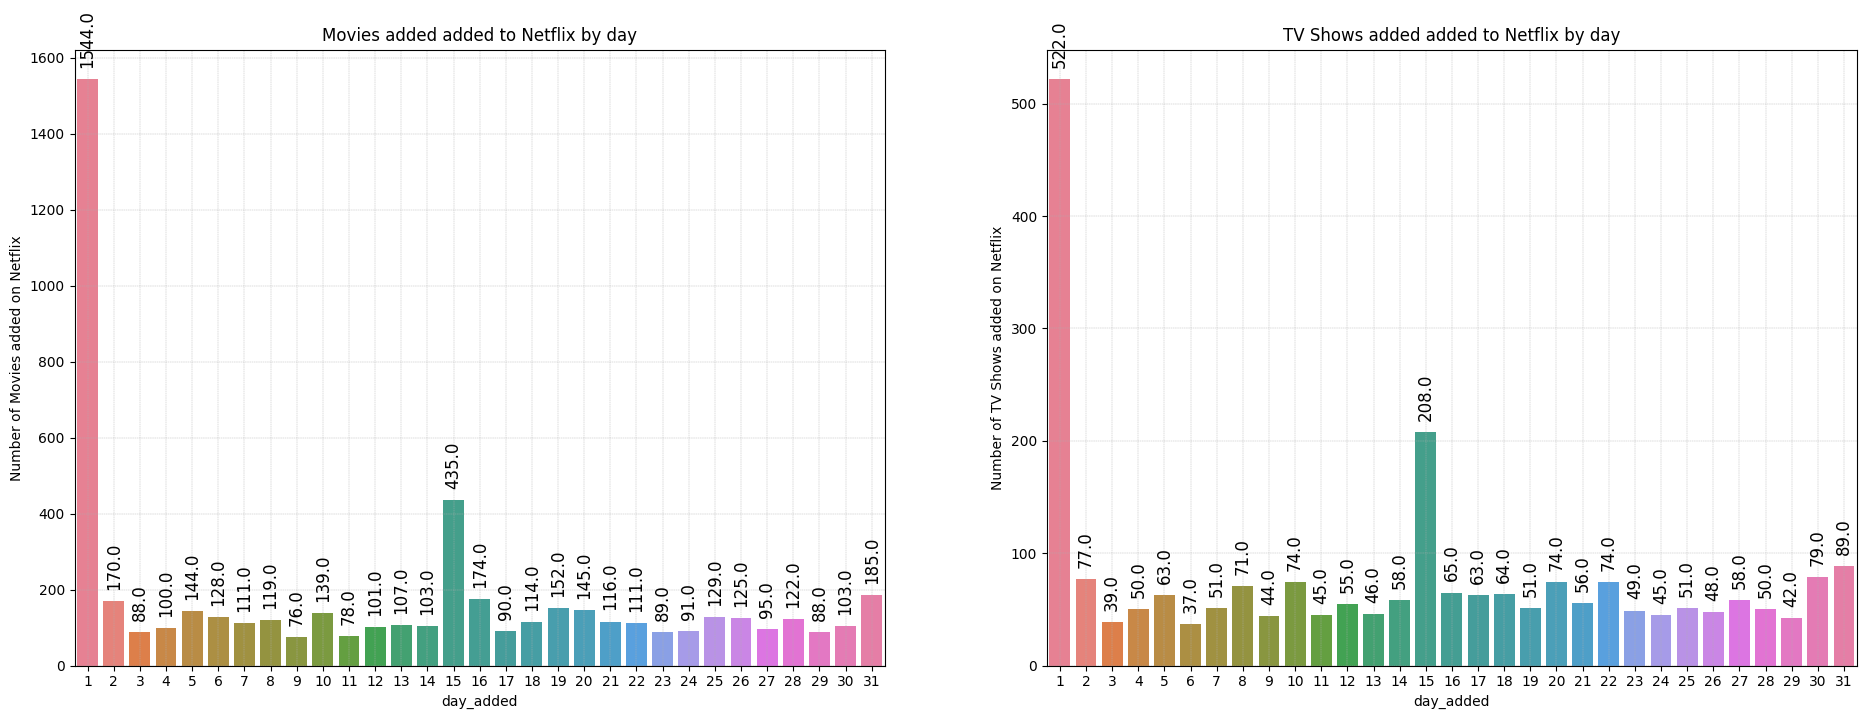

In [38]:
plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_day = i.groupby(['day_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['day_added'],ascending=False)
  plots= sns.barplot(x = 'day_added',y='title', data = df_day, palette='husl')
  plt.title(f'{j} added added to Netflix by day')
  plt.ylabel(f"Number of {j} added on Netflix")
  plt.grid(linestyle='--', linewidth=0.3)
  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='bottom',
                    size=12, xytext=(0, 8),
                    textcoords='offset points', rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

This graph shows us the day when most of the movies added in a month.

##### 2. What is/are the insight(s) found from the chart?

The bar plots show that movies and TV shows are usually added to the streaming service at the start or middle of the month. This might be because many people have more free time and money around those times, especially after they've been paid. Releasing new content during these periods could attract more viewers. When subscribers see fresh content early in the month, it makes them feel like they're getting more for their subscription, which could make them more likely to stick around and keep using the service.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Putting out new stuff on a regular basis is like keeping a surprise coming for users. It gives them something fresh to enjoy every few weeks. This can make them spend more time on the platform and make them happy, which is good for the business.

#### Chart - 11 (What is the Month-wise number of content added in each year on Netflix?)

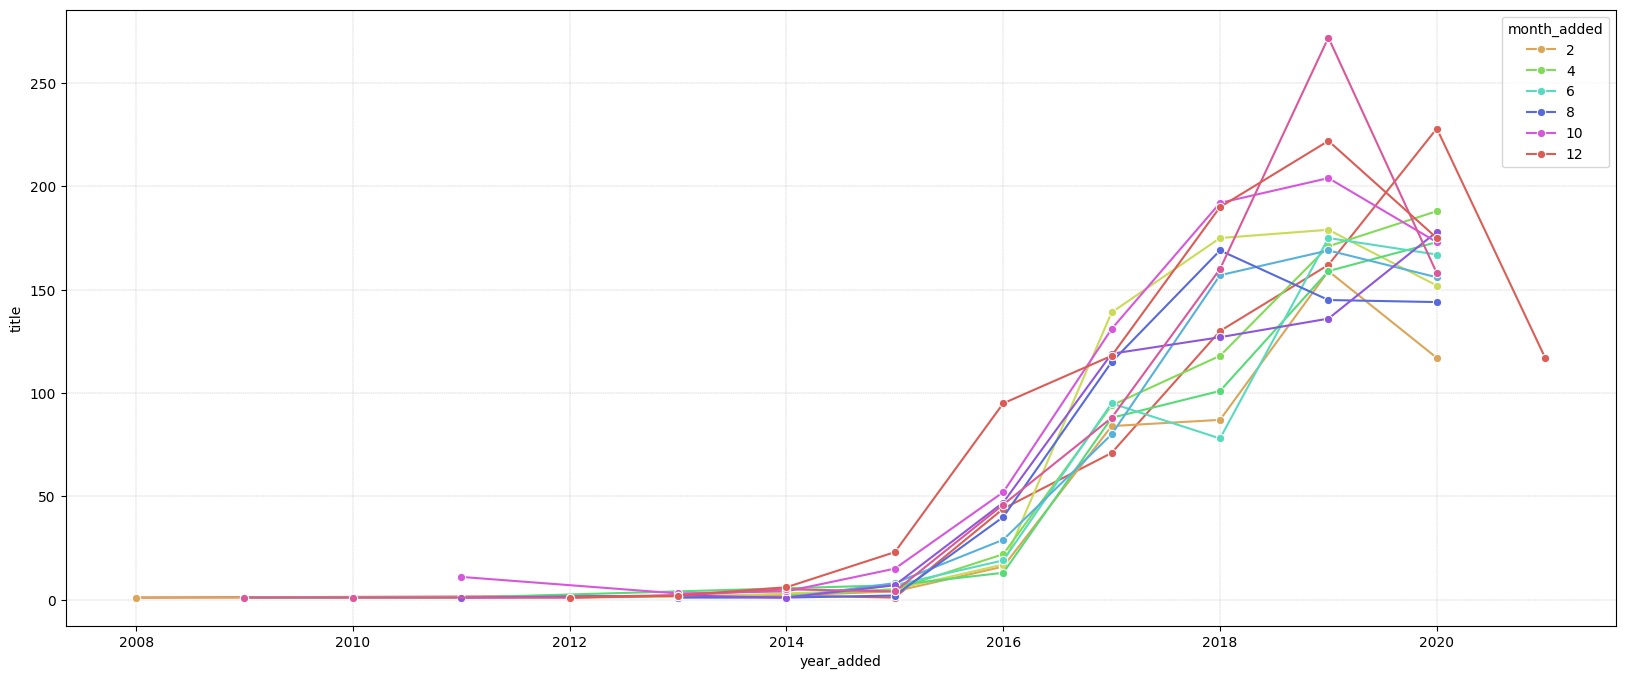

In [39]:
plt.figure(figsize=(20,8))
df_year_month = df.groupby(['year_added','month_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['year_added'],ascending=False)
sns.lineplot(x = 'year_added',y='title', data = df_year_month, palette = 'hls', hue=df_year_month['month_added'], marker='o')
plt.grid(linestyle='--', linewidth=0.3)
plt.show()

##### 1. Why did you pick the specific chart?

This bivariate graph helps us in knowing which month is dominating in adding movie/tvshows in a year.

##### 2. What is/are the insight(s) found from the chart?

1.We don't see a clear overall trend. Instead, some years follow a monthly pattern.

2.Between 2008 and 2011, movies were often added in February and October.

3.After 2015, most content is added from October to December.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Producers should add there movies in the month when audience is more responsive.

2. Although no specific trend is shown but most movies should be uploaded in year end with some discount in the subscription.

#### Chart - 12 (What is the Day-wise number of content added in each year on Netflix?)

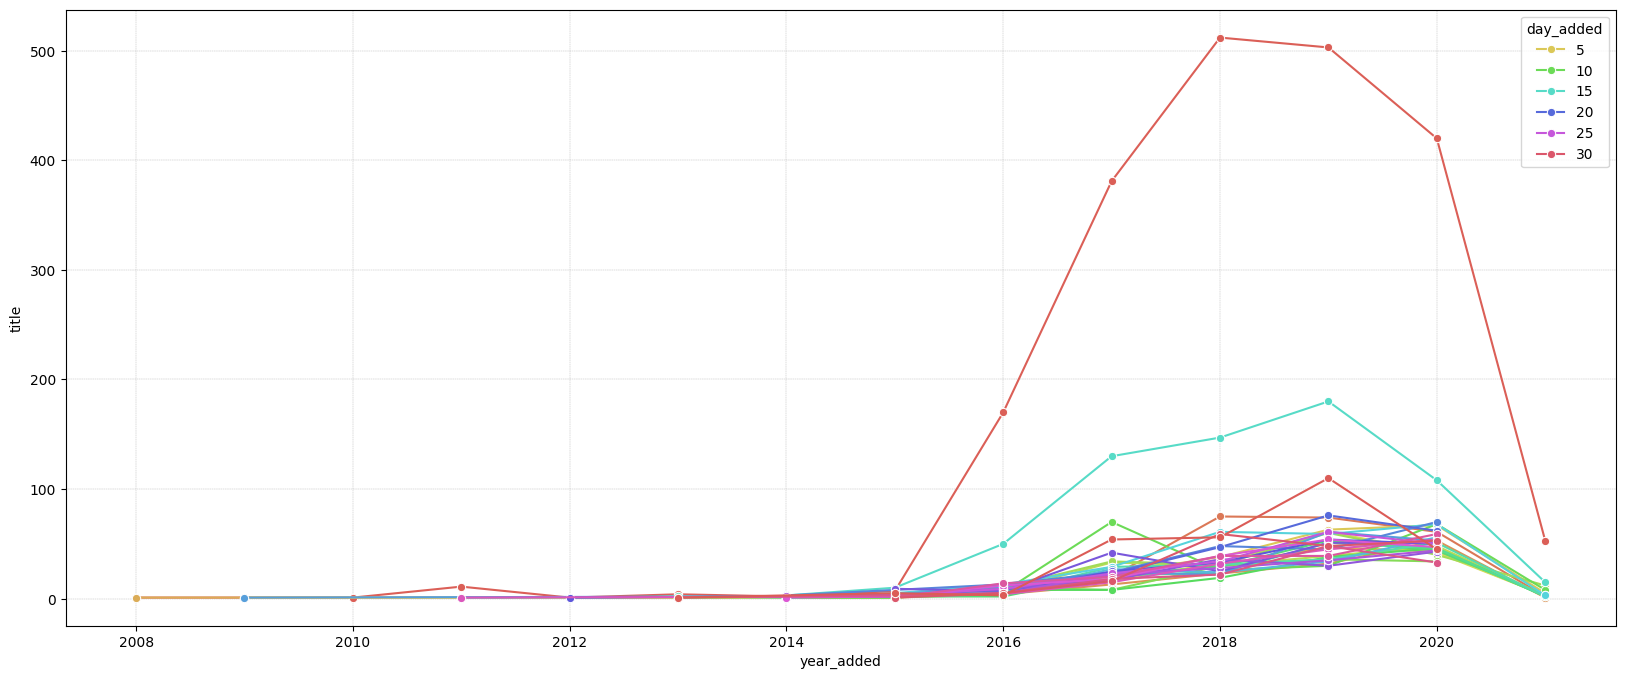

In [40]:
plt.figure(figsize=(20,8))
df_year_month = df.groupby(['year_added','day_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['year_added'],ascending=False)
sns.lineplot(x = 'year_added',y='title', data = df_year_month, palette = 'hls', hue=df_year_month['day_added'], marker='o')
plt.grid(linestyle='--', linewidth=0.3)
plt.show()

##### 1. Why did you pick the specific chart?

This graph help us in knowing which day is more frequent in movie addition year wise.

##### 2. What is/are the insight(s) found from the chart?

1. Movies from **2008 to 2009 added on 5th day** of the month.
2. Movies from **2009 to 2010 added on 15th day** of the month.
3. Most of the movies from **2010 to 2012 added in the month end.**
4. From **2015 onwords most of the movies are added in month end or mid month.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Currently most of the movies are added in 15th day of month or at the last day of month, so before releasing the movies consider this trend also.

#### Chart - 13 (What is the Distribution of Duration of contents over Netflix?)

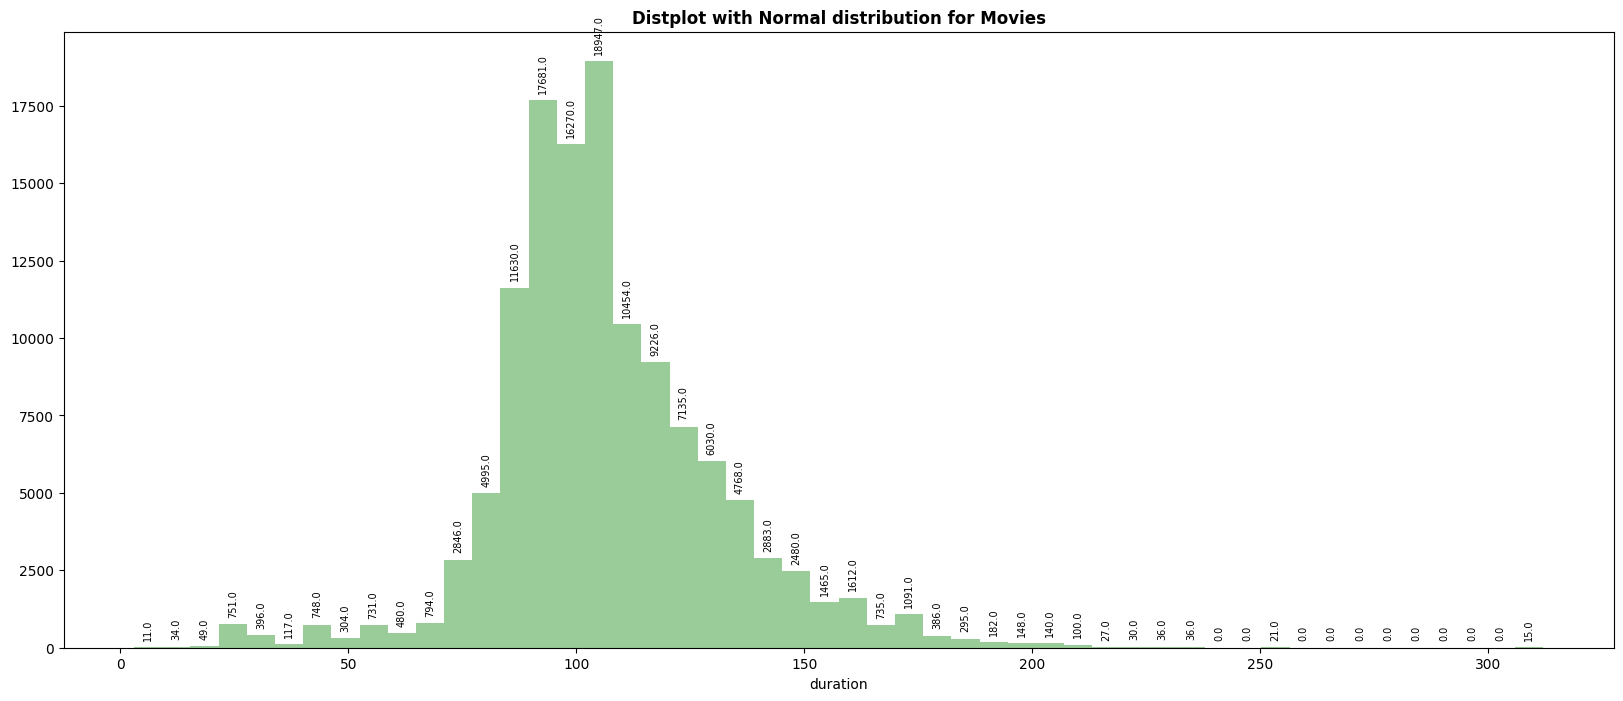

In [41]:
#Checking the distribution of Movie Durations
plt.figure(figsize=(20, 8))
plots= sns.distplot(df_movies['duration'],kde=False, color=['green'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
for bar in plots.patches:
   plots.annotate(bar.get_height(),
                  (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='bottom',
                  size=7, xytext=(0, 5),
                  textcoords='offset points', rotation=90)
plt.show()

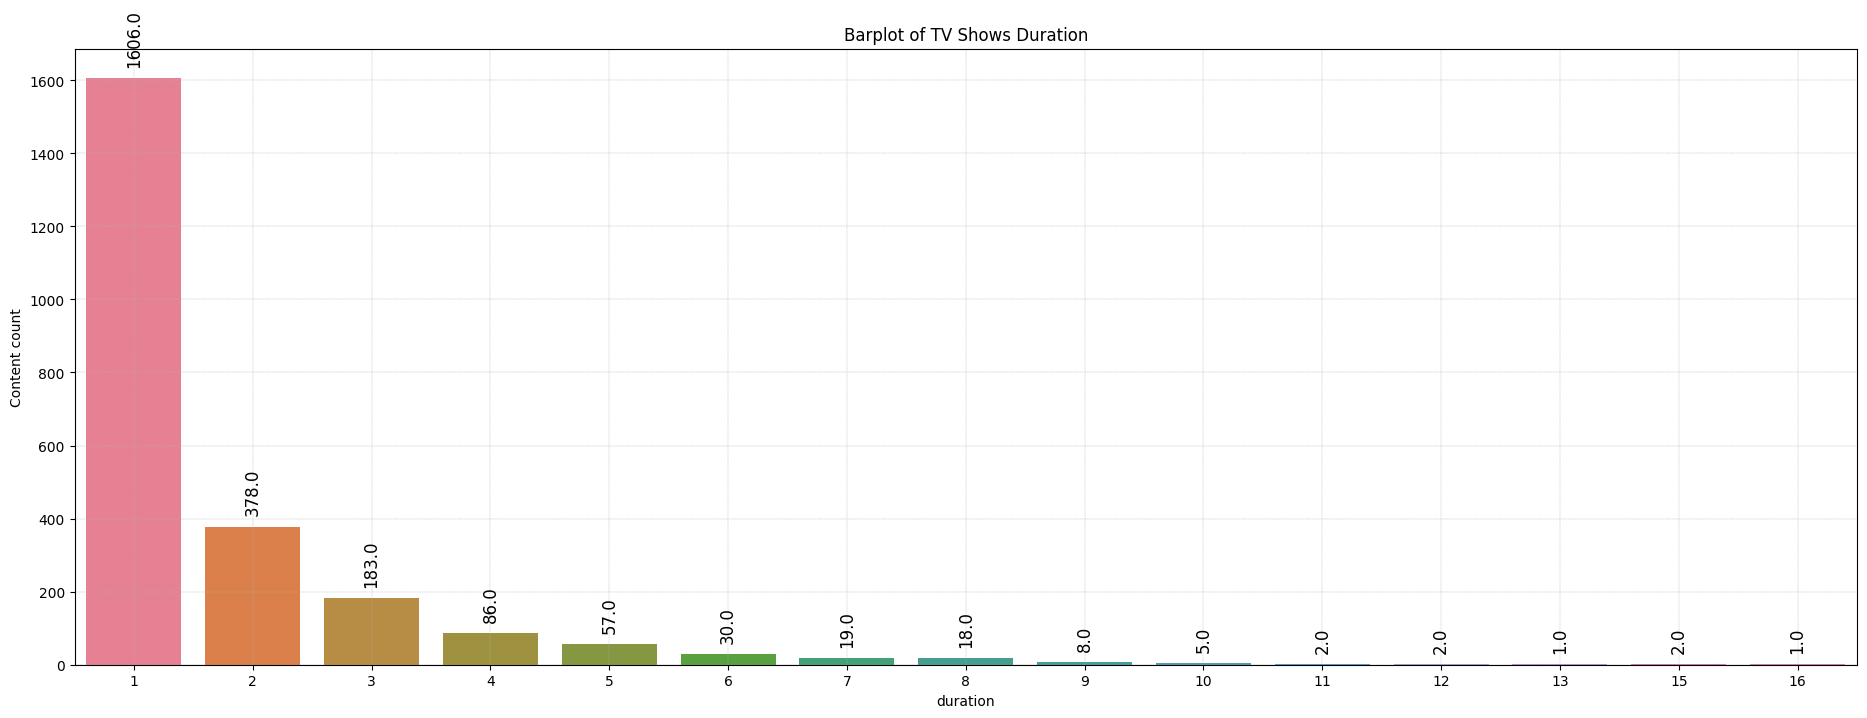

In [42]:
plt.figure(figsize=(23,8))
df_duration = df_tvshows.groupby(['duration']).agg({'title':'nunique'}).reset_index().sort_values(by=['duration'],ascending=False)
plots= sns.barplot(x = 'duration',y='title', data = df_duration, palette='husl')
plt.title(f'Barplot of TV Shows Duration')
plt.ylabel(f"Content count")
plt.grid(linestyle='--', linewidth=0.3)
for bar in plots.patches:
   plots.annotate(bar.get_height(),
                  (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='bottom',
                  size=12, xytext=(0, 8),
                  textcoords='offset points', rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

To know the duration distribution for Movies and TV Shows on Netflix.

##### 2. What is/are the insight(s) found from the chart?

1.The histogram of the distribution of movie durations in minutes on Netflix shows that the **majority of movies on Netflix have a duration between 80 to 120 minutes. **

2.The countplot of the distribution of TV show durations in seasons on Netflix shows that the most common **duration for TV shows on Netflix is one season**, followed by two seasons.

#### Chart - 14 - (What is the Distribution of Content Rating in each highest content creating countries?)

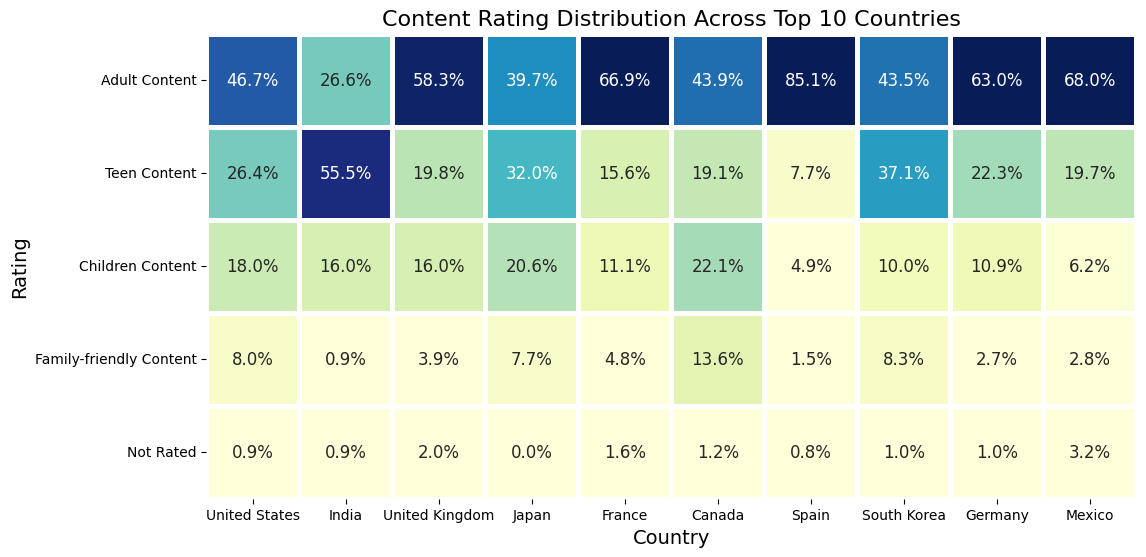

In [43]:
# Adding count column
df['count'] = 1

# Grouping and filtering top 10 countries
data = df.groupby('Country')['count'].sum().nlargest(10).reset_index()['Country']
df_heatmap = df[df['Country'].isin(data)]

# Creating a normalized crosstab for the heatmap
df_heatmap = pd.crosstab(df_heatmap['Country'], df_heatmap['rating'], normalize="index").T

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(12, 10))

# Defining order of representation
country_order = data.tolist()
rating_order = ['Adult Content', 'Teen Content', 'Children Content', 'Family-friendly Content', 'Not Rated']

# Calling and plotting heatmap with a different color palette
sns.heatmap(df_heatmap.loc[rating_order, country_order], cmap="YlGnBu", square=True, linewidth=2.5, cbar=False, annot=True, fmt='.1%',
            vmax=.6, vmin=0.05, ax=ax, annot_kws={"fontsize": 12})

# Adding labels and title
ax.set_xlabel('Country', fontsize=14)
ax.set_ylabel('Rating', fontsize=14)
plt.title('Content Rating Distribution Across Top 10 Countries', fontsize=16)

plt.show()



##### 1. Why did you pick the specific chart?

This graph shows us which countries producing which type of content the most.

##### 2. What is/are the insight(s) found from the chart?

1. We found that **most of the countries produces content related to Adult and Teen.**

2. Amomg all the countries **INDIA has less content in Adult segment than teen content.**

3. **85% of content is Adult content from spain.**
4. **Canada produces more content related to Children and Family-Friendly content**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Companies should target the country audience according to there taste of content choice.

2. As in spain Production house should more focus on Adult content.

3. Production house should more focus on children and Family-friendly content for canada because there are chances of Growth.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

*Hypothetical Statement 1:*
*  **Null Hypothesis:** People rate drama and comedy movies on Netflix about the same.

*  **Alternative Hypothesis:** People rate drama and comedy movies on Netflix differently.

*Hypothetical Statement 2:*

We're checking if the average time of TV shows added to Netflix in 2020 is the same as in 2021.

*  **Null Hypothesis:** The average time of TV shows added in 2020 and 2021 on Netflix is about the same.

*  **Alternative Hypothesis:** The average time of TV shows added in 2020 and 2021 on Netflix is different.


*Hypothetical Statement 3:*

*  **Null Hypothesis:** The proportion of American-made TV shows is about the same as the proportion of American-made movies on Netflix.

*  **Alternative Hypothesis:**The proportion of American-made TV shows is different from the proportion of American-made movies on Netflix.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*  **Null Hypothesis:** People rate drama and comedy movies on Netflix about the same.

*  **Alternative Hypothesis:** People rate drama and comedy movies on Netflix differently.

#### 2. Perform an appropriate statistical test.

In [44]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest  #------> This function is used to perform z test of proportion.

# Subset the data to only include drama and comedy movies
subset = df[df['Genre'].str.contains('Dramas') | df['Genre'].str.contains('Comedies')]

# Calculate the proportion of drama and comedy movies
drama_prop = len(subset[subset['Genre'].str.contains('Dramas')]) / len(subset)
comedy_prop = len(subset[subset['Genre'].str.contains('Comedies')]) / len(subset)

# Set up the parameters for the z-test
count = [int(drama_prop * len(subset)), int(comedy_prop * len(subset))]
nobs = [len(subset), len(subset)]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")


z-statistic:  64.8000705213286
p-value:  0.0
Reject the null hypothesis.


We conclude that there is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

##### Which statistical test have you done to obtain P-Value?

The statistical test we have used to obtain the P-value is the z-test for proportions.


##### Why did you choose the specific statistical test?

The z-test for proportions was chosen because we are comparing the proportions of two categorical variables (drama movies and comedy movies) in a sample. The null hypothesis and alternative hypothesis are about the difference in proportions, and we want to determine if the observed difference in proportions is statistically significant or not. The z-test for proportions is appropriate for this situation because it allows us to compare two proportions and calculate the probability of observing the difference we see in our sample if the null hypothesis were true.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis:** The average time of TV shows added in 2020 and 2021 on Netflix is about the same.

**Alternative Hypothesis:** The average time of TV shows added in 2020 and 2021 on Netflix is different.


#### 2. Perform an appropriate statistical test.

In [45]:
# Perform Statistical Test to obtain P-Value
# To test this hypothesis, we perform a two-sample t-test.
from scipy.stats import ttest_ind

# Create separate dataframes for TV shows in 2020 and 2021
tv_2020 = df[(df['type'] == 'TV Show') & (df['release_year'] == 2020)]
tv_2021 = df[(df['type'] == 'TV Show') & (df['release_year'] == 2021)]

# Perform two-sample t-test
t, p = ttest_ind(tv_2020['duration'].astype(int),
                 tv_2021['duration'].astype(int), equal_var=False)
print('t-value: ', t)
print('p-value: ', p)

# Print the results
if p < 0.05:
    print('Reject null hypothesis. \nThe average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.')
else:
    print('Failed to reject null hypothesis. \nThe average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.')



t-value:  -6.002151232542292
p-value:  7.23381843379902e-09
Reject null hypothesis. 
The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the P-Value is a two-sample t-test.


##### Why did you choose the specific statistical test?

The two-sample t-test was chosen because we are comparing the means of two different samples (TV shows added in 2020 vs TV shows added in 2021) to determine whether they are significantly different. Additionally, we assume that the two samples have unequal variances since it is unlikely that the duration of TV shows added in 2020 and 2021 would have the exact same variance.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis:** The proportion of American-made TV shows is about the same as the proportion of American-made movies on Netflix.

**Alternative Hypothesis:**The proportion of American-made TV shows is different from the proportion of American-made movies on Netflix.      

#### 2. Perform an appropriate statistical test.

In [46]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest  #------> This function is used to perform z test of proportion.

# Calculate the proportion of drama and comedy movies
tv_proportion = np.sum(df_tvshows['Country'].str.contains('United States')) / len(df_tvshows)
movie_proportion = np.sum(df_movies['Country'].str.contains('United States')) / len(df_movies)

# Set up the parameters for the z-test
count = [int(tv_proportion * len(df_tvshows)), int(movie_proportion * len(df_movies))]
nobs = [len(df_tvshows), len(df_movies)]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")


z-statistic:  -4.838078469799881
p-value:  1.3110038583414833e-06
Reject the null hypothesis.


We conclude that the proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.

##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain P-Value is a two-sample proportion test.



##### Why did you choose the specific statistical test?

We chose this specific statistical test because it is appropriate for comparing two proportions, and it helps us to determine whether the difference between the two proportions is due to chance or not.





## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [47]:
# Handling Missing Values & Missing Value Imputation
# Since we have already dealed with null value. So it is not needed now.
df.isna().sum()

title           0
Actors          0
Directors       0
Genre           0
Country         0
type            0
release_year    0
rating          0
duration        0
description     0
day_added       0
month_added     0
year_added      0
count           0
dtype: int64

Let's move ahead, as we have already dealed with null/missing values from our dataset.

### 2. Handling Outliers

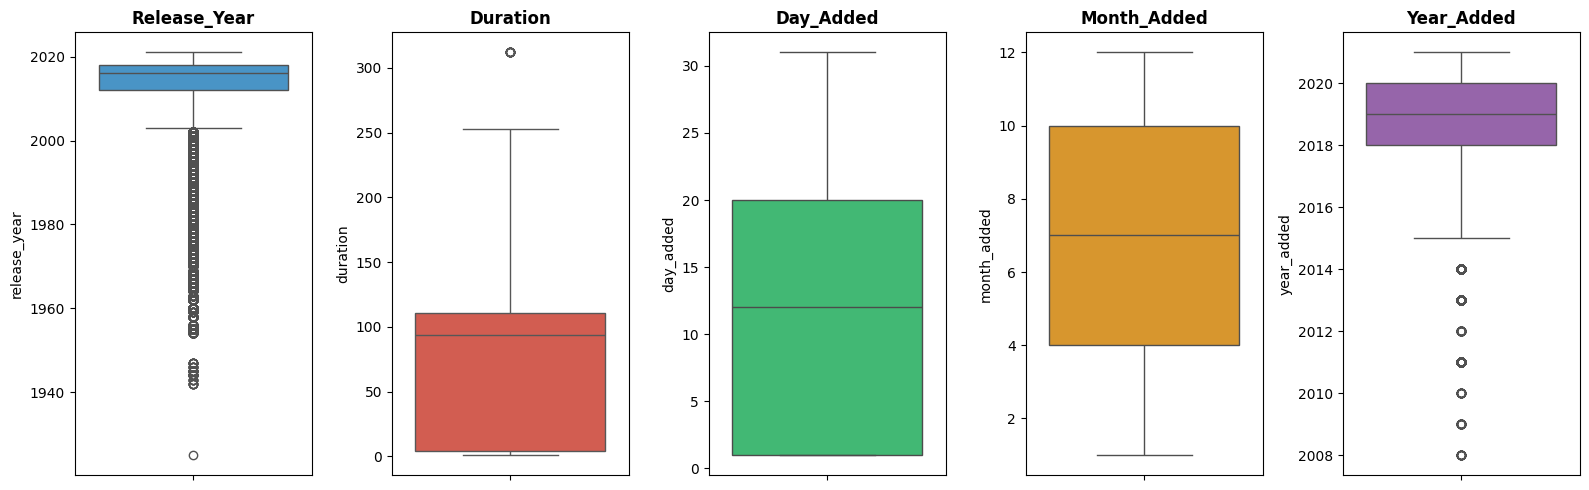

In [48]:
# Storing the continuous value feature in a separate list
continuous_value_feature = ["release_year", "duration", "day_added", "month_added", "year_added"]

# Custom color palette
custom_palette = ["#3498db", "#e74c3c", "#2ecc71", "#f39c12", "#9b59b6"]

# Checking outliers with the help of a box plot for continuous features
plt.figure(figsize=(16, 5))

for n, column in enumerate(continuous_value_feature):
    plt.subplot(1, 5, n+1)
    sns.boxplot(df[column], color=custom_palette[n])
    plt.title(f'{column.title()}', weight='bold')

plt.tight_layout()  # Ensure proper layout
plt.show()


### 3. Textual Data Preprocessing

In [49]:
# Here we are taking the copied dataframe as the data having more number of observations resulted in ram exhaustion.
df.shape, df_new.shape

((175807, 14), (7770, 12))

In [50]:
# Binning of rating in new dataframe
df_new['rating'].replace(rating_map, inplace = True)

# Checking sample after binning
df_new.sample(2)

show_id     type           title           director  \
6841   s6842    Movie    The Runaways  Floria Sigismondi   
1180   s1181  TV Show  Call My Agent!            Unknown   

                                                   cast        country  \
6841  Kristen Stewart, Dakota Fanning, Michael Shann...  United States   
1180  Camille Cottin, Thibault De Montalembert, Grég...         France   

           date_added  release_year         rating   duration  \
6841    April 1, 2020          2010  Adult Content    107 min   
1180  January 4, 2019          2018  Adult Content  3 Seasons   

                                           listed_in  \
6841    Dramas, Independent Movies, Music & Musicals   
1180  International TV Shows, TV Comedies, TV Dramas   

                                            description  
6841  This biopic charts the rise of the rebellious ...  
1180  At a top Paris talent firm, agents scramble to...

#### 1. Textual Columns

In [51]:
# Creating new feature content_detail with the help of other textual attributes
df_new["content_detail"]= df_new["cast"]+" "+df_new["director"]+" "+df_new["listed_in"]+" "+df_new["type"]+" "+df_new["rating"]+" "+df_new["country"]+" "+df_new["description"]

#checking the manipulation
df_new.head(5)

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year         rating   duration  \
0    August 14, 2020          2020  Adult Content  4 Seasons   
1  December 23, 2016          2016  Adult Content     93 min   
2  December 20, 2018          2011  Adult Content     78 min   
3  November 16, 2017          2009   Teen Content     80 min   
4    January 1, 2020          2008   Teen Content    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                      content_detail  
0  João Miguel, Bianca Comparato, Michel Gomes, R...  
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...

#### 2. Lower Casing

In [52]:
# Lower Casing
df_new['content_detail']= df_new['content_detail'].str.lower()

# Checking the manipulation
df_new.iloc[281,]['content_detail']

'tamannaah bhatia, prabhu deva, sonu sood, sapthagiri, murli sharma, r.v. udhaykumar, joy mathew, hema a. l. vijay comedies, international movies, sci-fi & fantasy movie teen content india due to family pressure, a corporate man reluctantly marries a woman from the village, but in their new home, she abruptly assumes a different persona.'

#### 3. Removing Punctuations

In [53]:
# function to remove punctuations
def remove_punctuations(text):
    '''This function is used to remove the punctuations from the given sentence'''
    #imorting needed library
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped off punctuation marks
    return text.translate(translator)

In [54]:
# Removing Punctuations from the content_detail
df_new['content_detail']= df_new['content_detail'].apply(remove_punctuations)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema a l vijay comedies international movies scifi  fantasy movie teen content india due to family pressure a corporate man reluctantly marries a woman from the village but in their new home she abruptly assumes a different persona'

#### 4. Removing URLs & Removing words and digits contain digits.

In [55]:
def remove_url_and_numbers(text):
    '''This function is used to remove the URL's and Numbers from the given sentence'''
    # importing needed libraries
    import re
    import string

    # Replacing the URL's with no space
    url_number_pattern = re.compile(r'https?://\S+|www\.\S+')
    text= re.sub(url_number_pattern,'', text)

    # Replacing the digits with one space
    text = re.sub('[^a-zA-Z]', ' ', text)

    # return the text stripped off URL's and Numbers
    return text

In [56]:
# Remove URLs & Remove words and digits contain digits
df_new['content_detail']= df_new['content_detail'].apply(remove_url_and_numbers)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema a l vijay comedies international movies scifi  fantasy movie teen content india due to family pressure a corporate man reluctantly marries a woman from the village but in their new home she abruptly assumes a different persona'

#### 5. Removing Stopwords & Removing White spaces

In [57]:
# Downloading stopwords
nltk.download('stopwords')

# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [58]:
def remove_stopwords_and_whitespaces(text):
    '''This function is used for removing the stopwords from the given sentence'''
    text = [word for word in text.split() if not word in stopwords.words('english')]

    # joining the list of words with space separator
    text=  " ".join(text)

    # removing whitespace
    text = re.sub(r'\s+', ' ', text)

    # return the manipulated string
    return text

In [59]:
# Remove URLs & Remove words and digits contain digits
df_new['content_detail']= df_new['content_detail'].apply(remove_stopwords_and_whitespaces)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema l vijay comedies international movies scifi fantasy movie teen content india due family pressure corporate man reluctantly marries woman village new home abruptly assumes different persona'

In [60]:
df_new['content_detail'][0]

'jo miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez motta celso frateschi unknown international tv shows tv dramas tv scifi fantasy tv show adult content brazil future elite inhabit island paradise far crowded slums get one chance join saved squalor'

#### 6. Tokenization

In [61]:
# Downloading needed libraries
nltk.download('punkt')

# Tokenization
df_new['content_detail']= df_new['content_detail'].apply(nltk.word_tokenize)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['tamannaah',
 'bhatia',
 'prabhu',
 'deva',
 'sonu',
 'sood',
 'sapthagiri',
 'murli',
 'sharma',
 'rv',
 'udhaykumar',
 'joy',
 'mathew',
 'hema',
 'l',
 'vijay',
 'comedies',
 'international',
 'movies',
 'scifi',
 'fantasy',
 'movie',
 'teen',
 'content',
 'india',
 'due',
 'family',
 'pressure',
 'corporate',
 'man',
 'reluctantly',
 'marries',
 'woman',
 'village',
 'new',
 'home',
 'abruptly',
 'assumes',
 'different',
 'persona']

#### 7. Text Normalization

In [62]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Importing WordNetLemmatizer from nltk module
from nltk.stem import WordNetLemmatizer

# Creating instance for wordnet
wordnet  = WordNetLemmatizer()

In [63]:
def lemmatizing_sentence(text):
    '''This function is used for lemmatizing (changing the given word into meaningfull word) the words from the given sentence'''
    text = [wordnet.lemmatize(word) for word in text]

    # joining the list of words with space separator
    text=  " ".join(text)

    # return the manipulated string
    return text

In [64]:
# Downloading needed libraries
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Rephrasing text by applying defined lemmatizing function
df_new['content_detail']= df_new['content_detail'].apply(lemmatizing_sentence)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema l vijay comedy international movie scifi fantasy movie teen content india due family pressure corporate man reluctantly marries woman village new home abruptly assumes different persona'

##### Which text normalization technique have you used and why?

We have used Lemmatization instead of Stemming for our project because:

* **Lemmatization produces a more accurate base word**: Unlike Stemming, which just chops off the ends of words, Lemmatization looks at what the word means and how it's used to get a more accurate base form.

* **Lemmatization can handle different inflections**: It can deal with all kinds of word changes, like plurals, verb tenses, and comparisons, making it great for understanding natural language.

* **Lemmatization produces real words**:  Every word it produces is a real word you can find in a dictionary. This makes it easier to make sense of the results when we're analyzing text.

* **Lemmatization improves text understanding**: By simplifying words to their base form, Lemmatization helps us grasp the meaning and context of sentences more easily.

* **Lemmatization supports multiple languages**:Unlike Stemming, which might struggle with languages other than English, Lemmatization is effective for lots of different languages.

#### 8. Part of speech tagging

In [65]:
# tokenize the text into words before POS Taging
df_new['pos_tags'] = df_new['content_detail'].apply(nltk.word_tokenize).apply(nltk.pos_tag)

# Checking the observation after manipulation
df_new.head(5)

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year         rating   duration  \
0    August 14, 2020          2020  Adult Content  4 Seasons   
1  December 23, 2016          2016  Adult Content     93 min   
2  December 20, 2018          2011  Adult Content     78 min   
3  November 16, 2017          2009   Teen Content     80 min   
4    January 1, 2020          2008   Teen Content    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                      content_detail  \
0  jo miguel bianca comparato michel gomes rodolf...   
1  demi n bichir h ctor bonilla oscar serrano aza...   
2  tedd chan stella chung henley hii lawrence koh...   
3  elijah wood john c reilly jennifer connelly ch...   
4  jim sturgess kevin spacey kate bosworth aaron ...   

                                            pos_tags  
0  [(jo, NN), (miguel, NN), (bianca, NN), (compar...  
1  [(demi, NN), (n, CC), (bichir, NN), (h, NN), (...  
2  [(tedd, NN), (chan, NN), (stella, NN), (chung,...  
3  [(elijah, RB), (wood, NN), (john, NN), (c, VBP...  
4  [(jim, NN), (sturgess, NN), (kevin, NN), (spac...

#### 9. Text Vectorization

In [66]:
# Vectorizing Text
# Importing needed libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating instance
tfidfv = TfidfVectorizer(max_features=30000)        # Setting max features as 30000 to avoid RAM explosion

In [67]:
# Fitting on TfidfVectorizer
x= tfidfv.fit_transform(df_new['content_detail'])

# Checking shape of the formed document matrix
print(x.shape)

(7770, 30000)


##### Which text vectorization technique have you used and why?

"We chose to use TF-IDF (Term Frequency-Inverse Document Frequency) instead of the Bag of Words method. Here's why:

Importance of Words:

TF-IDF considers how important each word is in a document. It doesn't just count how many times a word appears; it looks at how relevant and significant each word is to the document's meaning.
Highlighting Unique Words:

TF-IDF gives higher scores to words that are rare and unique to a specific document. So, if a word is not common across all documents but appears a lot in one document, TF-IDF recognizes it as important for that particular document.
In simple terms, TF-IDF helps us represent documents in a way that takes into account not just the frequency of words but also their importance and uniqueness in each document."

### 4. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

In textual data processing, there are 30,000 attributes are created in text vectorization and this huge amount of columns cannot be dealed with our local machines. So, we will using the Principal Component Analysis(PCA) techniques to reduce the dimensions of this huge sparse matrix.

In [68]:
# Dimensionality Reduction
# Importing PCA from sklearn
from sklearn.decomposition import PCA

# Defining PCA object with desired number of components
pca = PCA()

# Fitting the PCA model
pca.fit(x.toarray())

# percent of variance captured by each component
variance = pca.explained_variance_ratio_
print(f"Explained variance: {variance}")

Explained variance: [1.44285929e-02 4.03650307e-03 3.30085224e-03 ... 1.19007193e-35
 5.87480154e-36 6.87367427e-37]


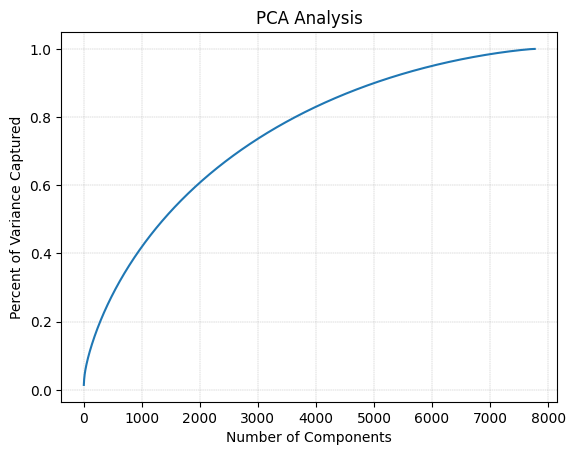

In [69]:
# Ploting the percent of variance captured versus the number of components in order to determine the reduced dimensions
fig, ax = plt.subplots()
ax.plot(range(1, len(variance)+1), np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('Number of Components')
ax.set_ylabel('Percent of Variance Captured')
ax.set_title('PCA Analysis')
plt.grid(linestyle='--', linewidth=0.3)
plt.show()

It is clear from the above plot that 7770 principal components can capture the 100% of variance. For our case we will consider only those number of PC's that can capture 95% of variance.

In [70]:
## Now we are passing the argument so that we can capture 95% of variance.
# Defining instance
pca_tuned = PCA(n_components=0.95)

# Fitting and transforming the model
pca_tuned.fit(x.toarray())
x_transformed = pca_tuned.transform(x.toarray())

# Checking the shape of transformed matrix
x_transformed.shape

(7770, 5997)

##### Which dimensionality reduction technique have you used and why?

We used something called PCA to make our job easier. PCA is like magic for handling lots of data. Imagine you have tons of information, and it's a bit overwhelming. PCA helps us simplify things.

Here's how it works: PCA looks at all the information and finds the most important parts. It's like figuring out the key ingredients in a recipe. These important parts are called "principal components."

Now, instead of dealing with all the details, we focus on these key ingredients. It's like looking at a simplified version of the big picture. This makes it easier to understand and work with.

People like using PCA because it's not too complicated, it's quick to use on computers, and almost every data tool knows about it. Also, smart researchers have looked into PCA a lot, so we know it's reliable.

In a nutshell, PCA helps us simplify complex data so we can understand it better and make more sense of it.

## ***7. ML Model Implementation***

### ML Model - 1 (K-Means Clustering)

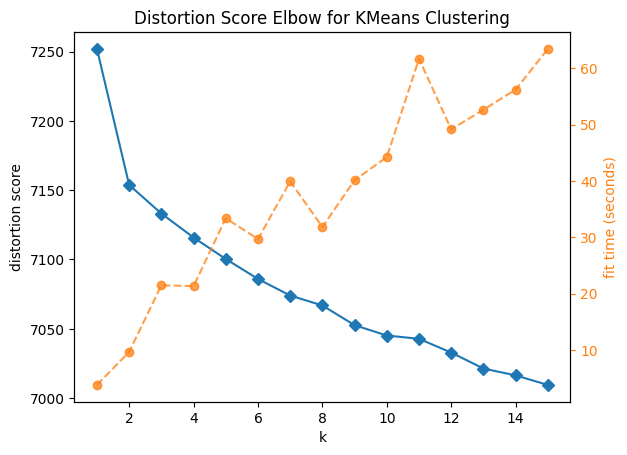

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [71]:
## Determining optimal value of K using KElbowVisualizer
# Importing needed library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1,16),locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(x_transformed)

# Finalize and render the figure
visualizer.show()

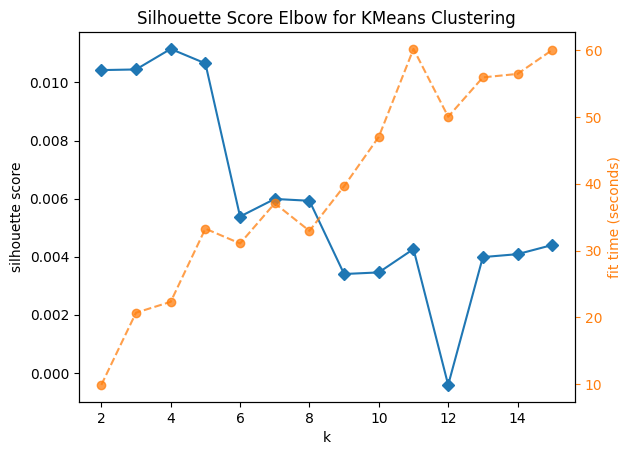

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [72]:
## Determining optimal value of K using KElbowVisualizer
# Importing needed library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(model, k=(2,16), metric='silhouette', timings=True, locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(x_transformed)

# Finalize and render the figure
visualizer.show()

In [73]:
## Computing Silhouette score for each k
# Importing needed libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Defining Range
k_range = range(2, 7)
for k in k_range:
    Kmodel = KMeans(n_clusters=k)
    labels = Kmodel.fit_predict(x_transformed)
    score = silhouette_score(x, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

k=2, Silhouette score=0.010375
k=3, Silhouette score=0.009972
k=4, Silhouette score=0.010569
k=5, Silhouette score=0.002987
k=6, Silhouette score=0.003848


From the above plots (Elbow plot and Sillhouette plot) it is very clear that the Silhoutte score is comparatively good for 4 number of clusters, so we will consider 4 cluster in kmeans analysis.

Now let's plot and see how our data points look like after assigning to their respective clusters.

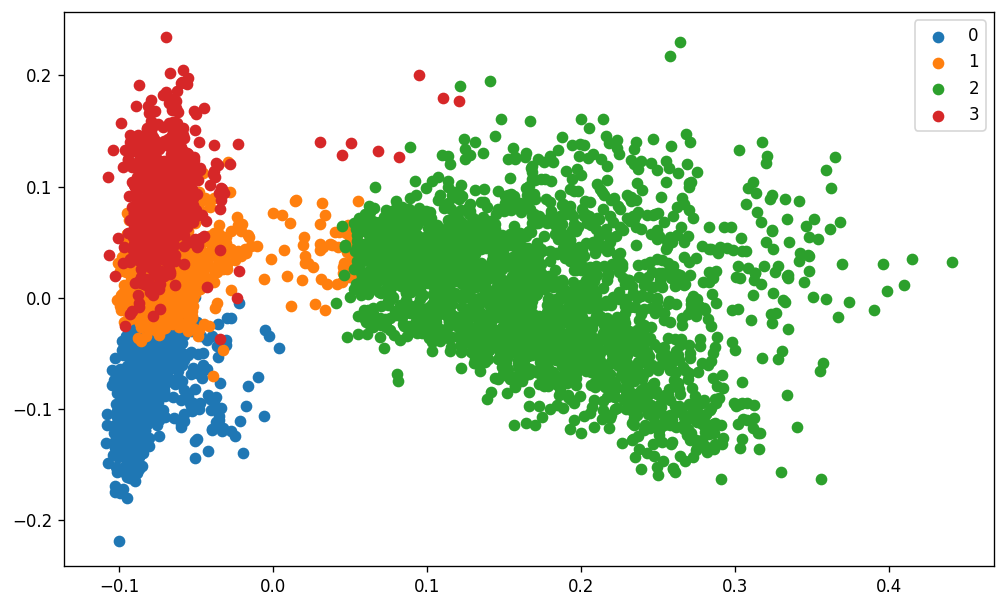

In [74]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 0)

#predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=120)
label = kmeans.fit_predict(x_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(x_transformed[label == i , 0] , x_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

We have 4 different clusters but unfortunately the above plot is in TWO-DIMENSIONAL. Let's plot the above figure in 3D using mplot3d library and see if we are getting the separated clusters.

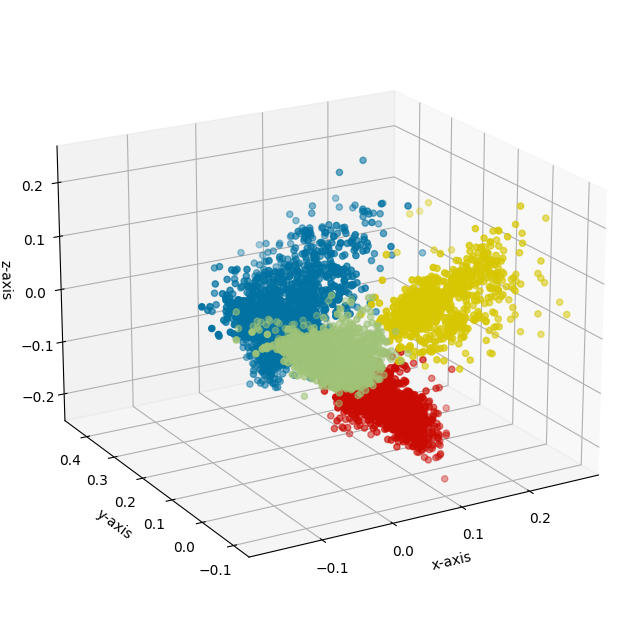

In [75]:
# Importing library to visualize clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y']
for i in range(len(colors)):
    ax.scatter(x_transformed[kmeans.labels_ == i, 2], x_transformed[kmeans.labels_ == i, 0], x_transformed[kmeans.labels_ == i, 1], c=colors[i])

# Rotate the plot 30 degrees around the X axis and 45 degrees around the Z axis
ax.view_init(elev=20, azim=-120)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

Cool, we can easily differentiate the all 4 clusters with naked eye. Now let's assign the 'Conent' in their respective cluster by appending 1 more attribute in the final dataframe.

In [76]:
# Add cluster values to the dateframe.
df_new['kmeans_cluster'] = kmeans.labels_

#### 1. Explain the ML Model used and it's performance ?

Starting with defining a function that plot a wordcloud for each of the attribute in the given dataframe.

In [77]:
def kmeans_wordcloud(cluster_number, column_name):
    '''function for Building a wordcloud for the movie/shows'''

    #Importing libraries
    from wordcloud import WordCloud, STOPWORDS

    # Filter the data by the specified cluster number and column name
    df_wordcloud = df_new[['kmeans_cluster', column_name]].dropna()
    df_wordcloud = df_wordcloud[df_wordcloud['kmeans_cluster'] == cluster_number]
    df_wordcloud = df_wordcloud[df_wordcloud[column_name].str.len() > 0]

    # Combine all text documents into a single string
    text = " ".join(word for word in df_wordcloud[column_name])

    # Create the word cloud
    wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

    # Convert the wordcloud to a numpy array
    image_array = wordcloud.to_array()

    # Return the numpy array
    return image_array

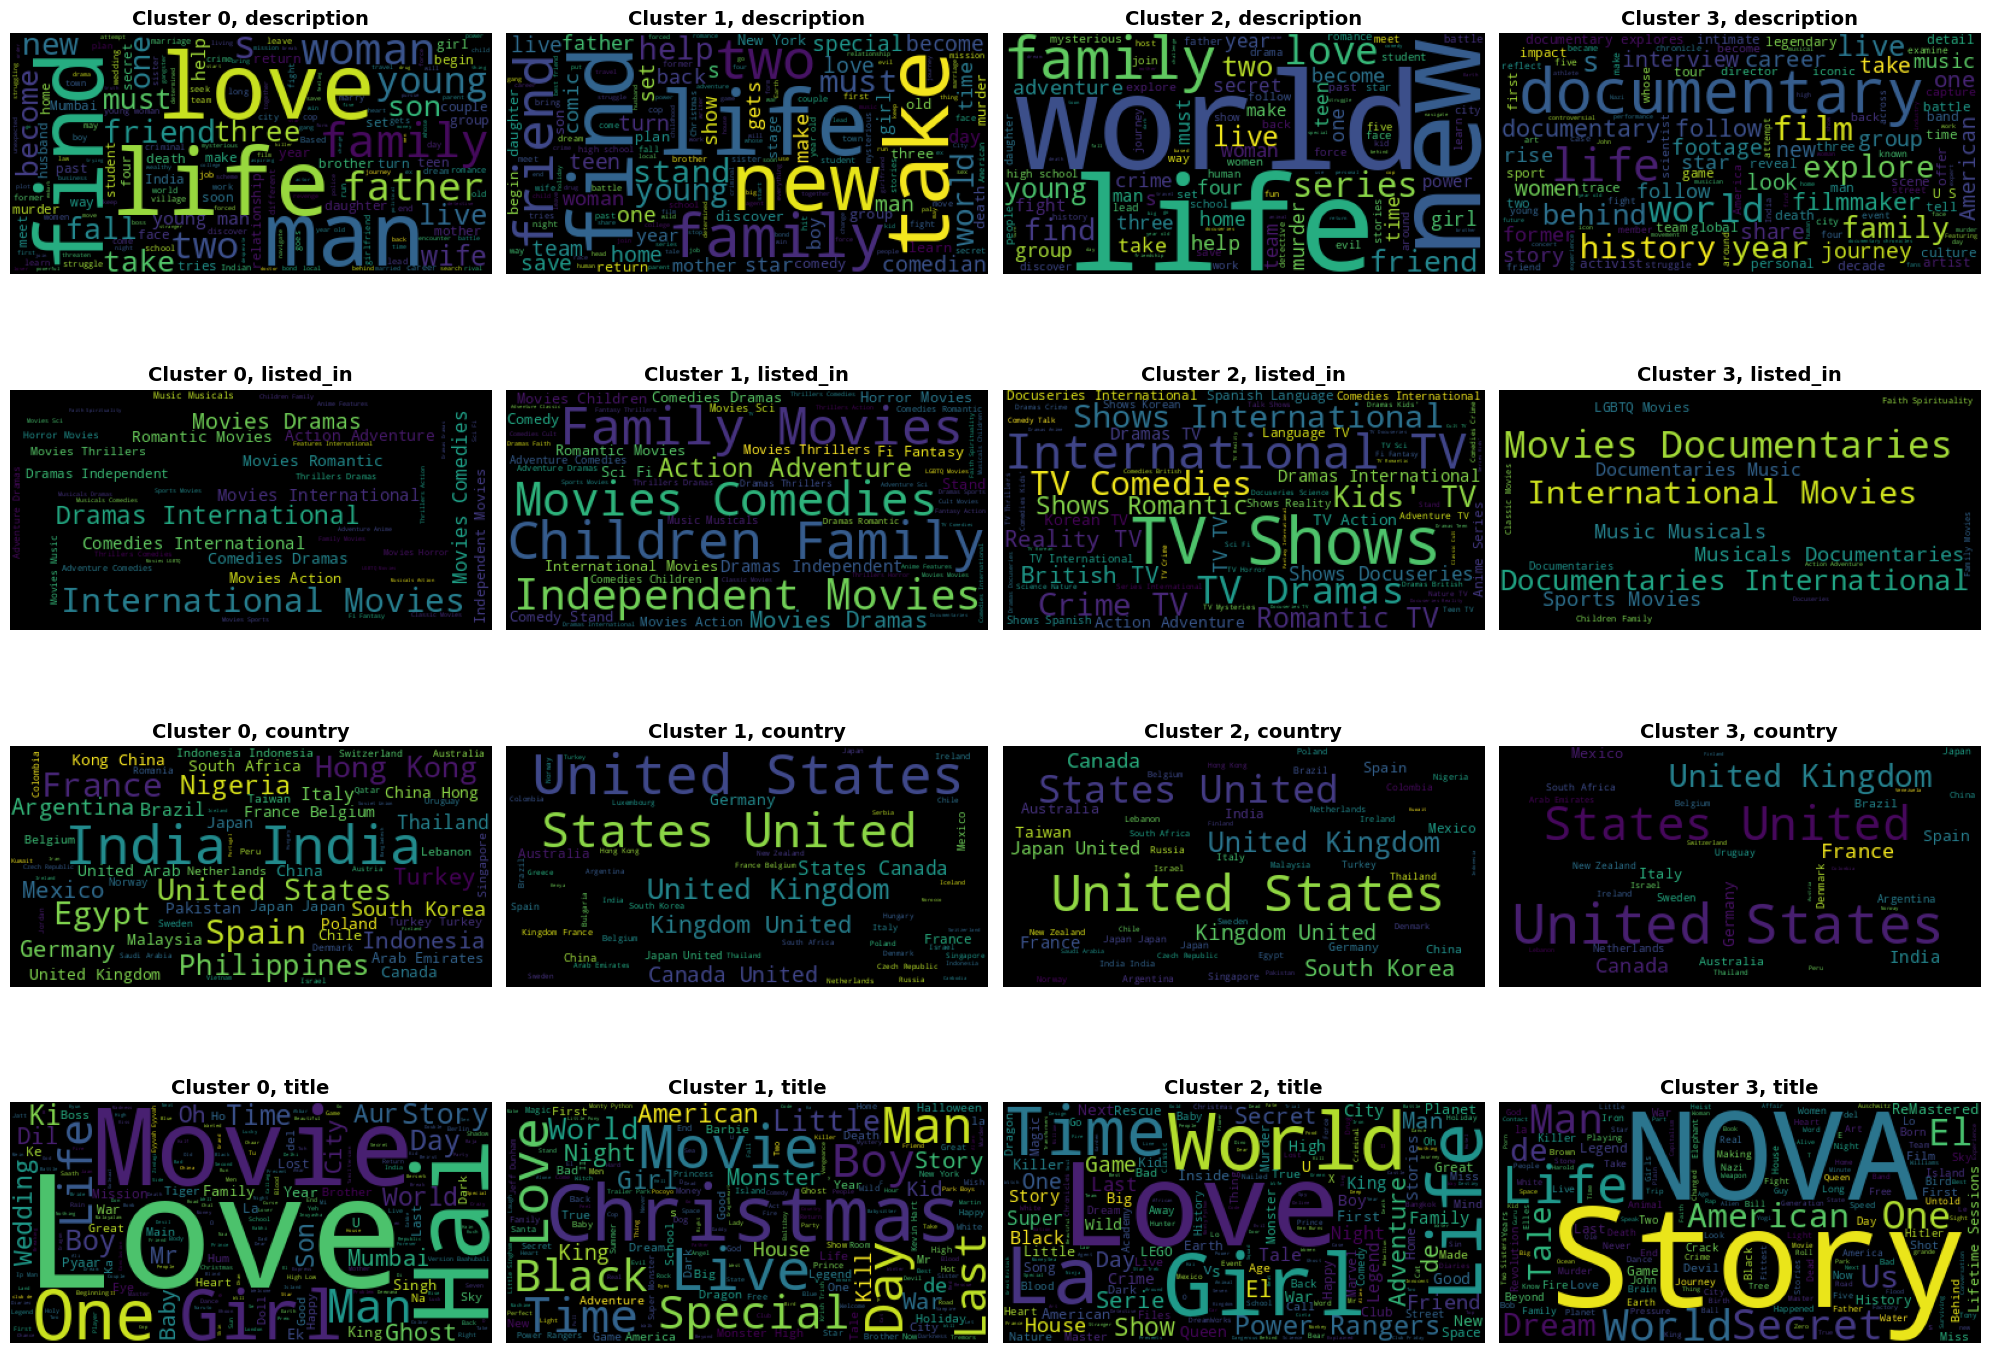

In [78]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
for i in range(4):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(kmeans_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### ML Model - 2 (Hierarchial Clustering)

Hierarchical clustering is a type of clustering algorithm used for grouping similar data points together into clusters based on their similarity, by recursively merging or dividing clusters based on a measure of similarity or distance between them.

Let's dive into it by plotting a Dendogram and then we will determine the optimal number of clusters.

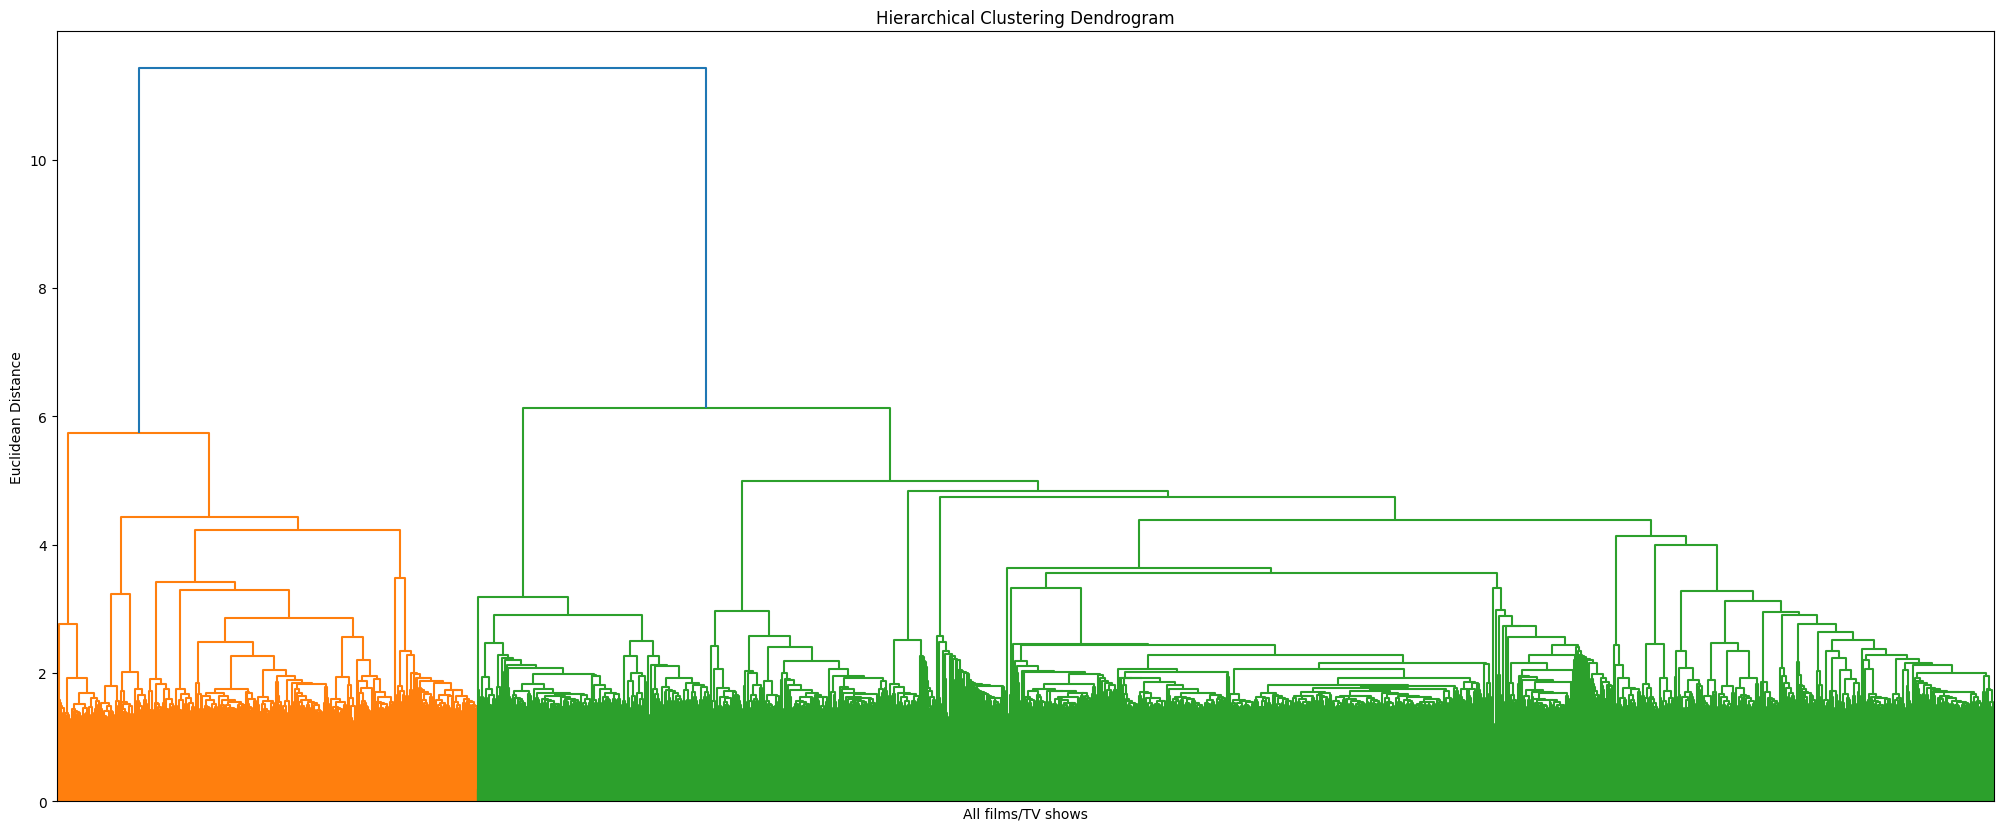

In [79]:
#importing needed libraries
from scipy.cluster.hierarchy import linkage, dendrogram

# HIERARCHICAL CLUSTERING
distances_linkage = linkage(x_transformed, method = 'ward', metric = 'euclidean')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('All films/TV shows')
plt.ylabel('Euclidean Distance')

dendrogram(distances_linkage, no_labels = True)
plt.show()

What is a Dendrogram?
A dendrogram is like a family tree for your data. It shows how things are grouped together or split apart. If the lines are really long in the dendrogram, it means those groups are quite different from each other.

How to Determine the Optimal Number of Clusters?
Imagine the dendrogram is like a bunch of people holding hands. The more they spread out, the more different groups you might have. In the picture, it looks like 2 main groups.

But, before saying "Okay, we have 2 groups," we check something called the silhouette score. It's like looking at how well the people in the groups get along.

So, we might see 2 groups in the picture, but we use a special method to make sure it's the best way to group them. We don't just trust our eyes; we also use numbers to be really sure.

In [80]:
## Computing Silhouette score for each k
# Importing needed libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Range selected from dendrogram above
k_range = range(2, 10)
for k in k_range:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(x_transformed)
    score = silhouette_score(x, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

k=2, Silhouette score=0.005102
k=3, Silhouette score=0.004963
k=4, Silhouette score=0.000350
k=5, Silhouette score=0.000442
k=6, Silhouette score=0.001113
k=7, Silhouette score=0.001415
k=8, Silhouette score=0.000528
k=9, Silhouette score=0.000950


From the above silhouette scores it is clear that the 2  clusters are optimal value (maximum Silhouette score), which is also clear from the above Dendogram that for 2 cluters the euclidean distances are maximum.

Let's again plot the chart and observe the 2 different formed clusters.

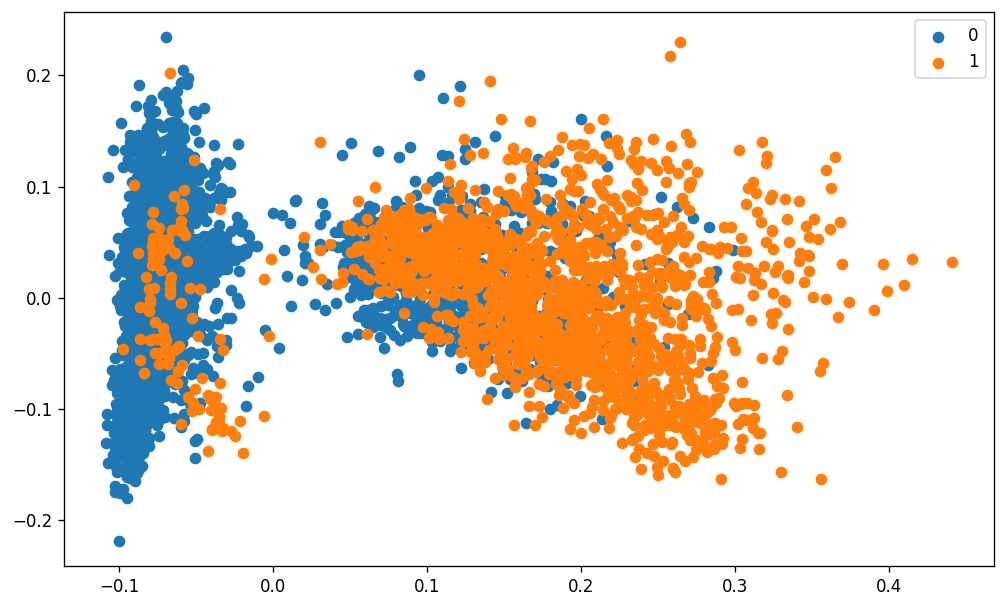

In [81]:
#training the K-means model on a dataset
Agmodel = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')

#predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=120)
label = Agmodel.fit_predict(x_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(x_transformed[label == i , 0] , x_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

Again plotting the 3 Dimensional plot to see the clusters clearly.

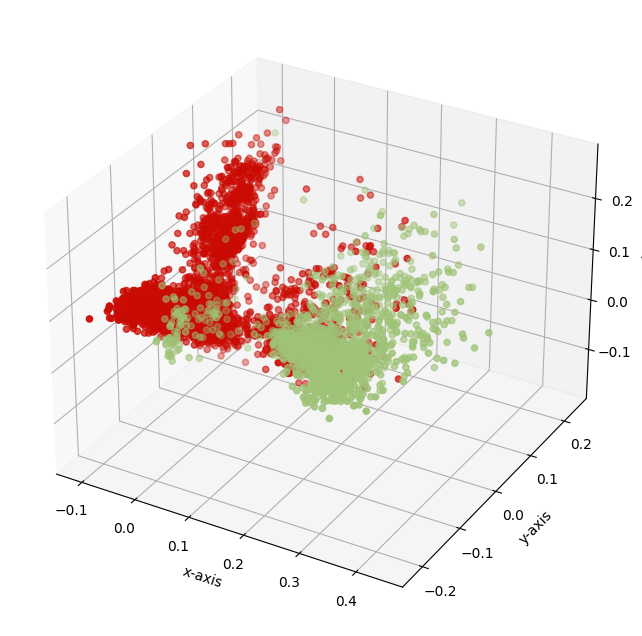

In [82]:
# Importing library to visualize clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y']
for i in range(len(colors)):
    ax.scatter(x_transformed[Agmodel.labels_ == i, 0], x_transformed[Agmodel.labels_ == i, 1], x_transformed[Agmodel.labels_ == i, 2],c=colors[i])
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

Cool, we can again easily differentiate the all 2 clusters with naked eye. Now let's assign the 'Content(Movies and TV Shows)' in their respective cluster by appending 1 more attribute in the final dataframe.

In [83]:
# Add cluster values to the dateframe.
df_new['agglomerative_cluster'] = Agmodel.labels_

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Let's just again define a function that plots wordcloud for different attributes using Agglomerative Clustering.

In [84]:
def agglomerative_wordcloud(cluster_number, column_name):
  '''function for Building a wordcloud for the movie/shows'''

  #Importing libraries
  from wordcloud import WordCloud, STOPWORDS

  # Filter the data by the specified cluster number and column name
  df_wordcloud = df_new[['agglomerative_cluster', column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['agglomerative_cluster'] == cluster_number]

  # Combine all text documents into a single string
  text = " ".join(word for word in df_wordcloud[column_name])

  # Create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

  # Return the word cloud object
  return wordcloud

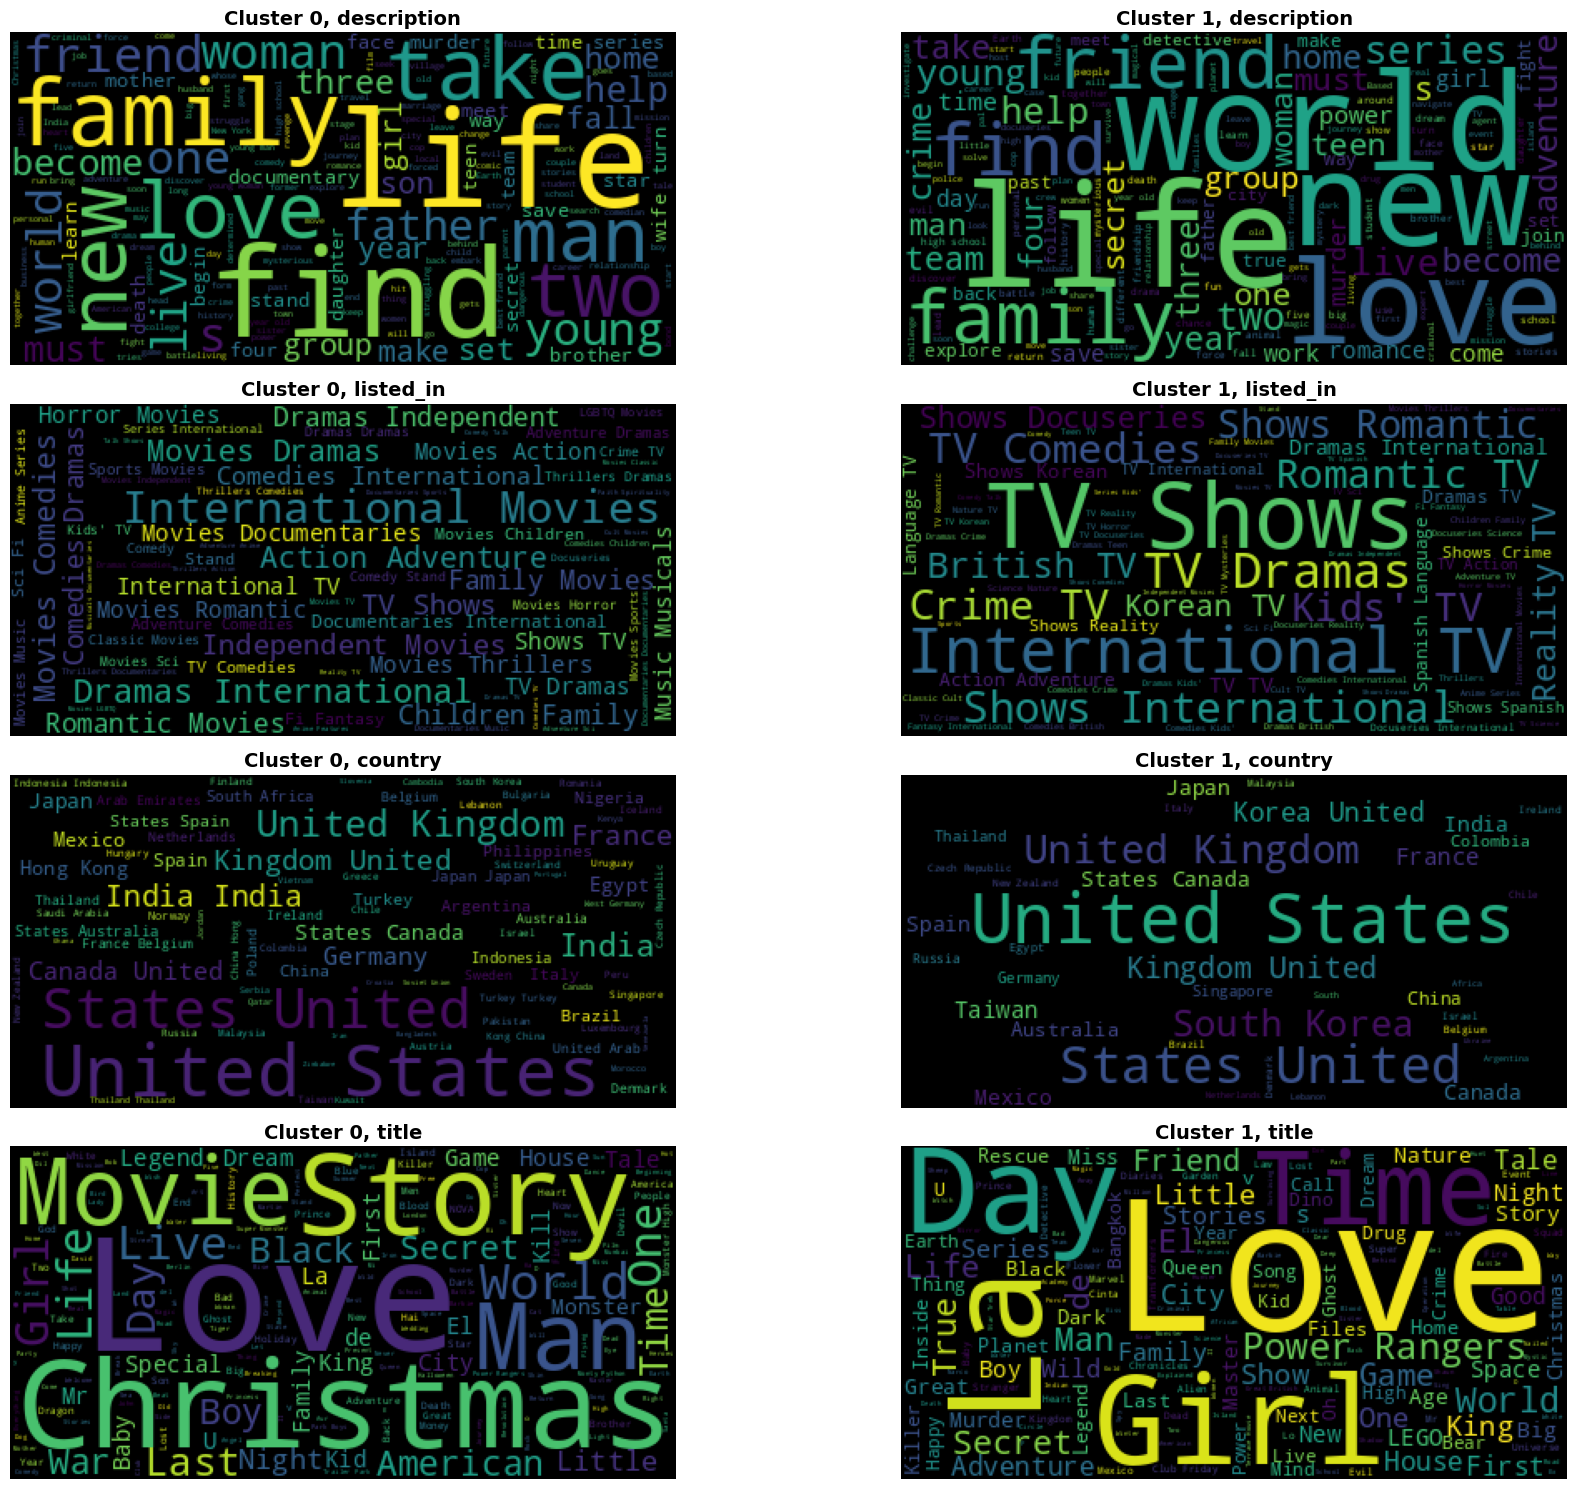

In [85]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
for i in range(2):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(agglomerative_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### ML Model - 3 (Cosine similarity)

Cosine Similarity is like a measuring tool we use to see how similar two things are. In our case, we use it to figure out how similar two pieces of text are.

Imagine each document (like an article or a paragraph) as a bunch of arrows pointing in different directions. The longer the arrow, the more of that particular word is in the document. Cosine similarity helps us measure how much these arrow directions are alike.

Here's why we like using it:

Handling Lots of Words:

Cosine similarity works well when we have lots of words in our documents, like in articles or books.
Understanding What Words Mean:

It's good at understanding what the words actually mean in the text. It doesn't get confused if the words are in a different order.
Not Missing Word Order:

Even if the words are in a different order in two texts, cosine similarity still says they are similar.
Why We Like It More Than Other Methods:

We choose to use cosine similarity instead of other methods because it's really good at handling lots of words and understanding the meaning of the text.
In simple terms, it helps us figure out how much two pieces of text are alike, considering all the words they have.

In [86]:
# Importing neede libraries
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF vectorizer object and transform the text data
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_new['content_detail'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

def recommend_content(title, cosine_sim=cosine_sim, data=df_new):
    # Get the index of the input title in the programme_list
    programme_list = data['title'].to_list()
    index = programme_list.index(title)

    # Create a list of tuples containing the similarity score and index
    # between the input title and all other programmes in the dataset
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the list of tuples by similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    # Get the recommended movie titles and their similarity scores
    recommend_index = [i[0] for i in sim_scores]
    rec_movie = data['title'].iloc[recommend_index]
    rec_score = [round(i[1], 4) for i in sim_scores]

    # Create a pandas DataFrame to display the recommendations
    rec_table = pd.DataFrame(list(zip(rec_movie, rec_score)), columns=['Recommendation', 'Similarity_score(0-1)'])

    return rec_table

Let's check how our recommender system is performing.

In [87]:
# Testing indian movie
recommend_content('Kal Ho Naa Ho')

Recommendation  Similarity_score(0-1)
0                                     Dil Chahta Hai                 0.2567
1                                          Kya Kehna                 0.2300
2  My Next Guest with David Letterman and Shah Ru...                 0.2048
3                                 Kuch Kuch Hota Hai                 0.1842
4                              Together For Eternity                 0.1840
5                               Kabhi Haan Kabhi Naa                 0.1814
6                                    Chashme Baddoor                 0.1776
7                           Kabhi Khushi Kabhie Gham                 0.1725
8                             Kabhi Alvida Naa Kehna                 0.1713
9                                      Chalte Chalte                 0.1699

In [88]:
# Testing non indian movie
recommend_content('Zombieland')

Recommendation  Similarity_score(0-1)
0     30 Minutes or Less                 0.1600
1                Kingpin                 0.1121
2        No Reservations                 0.1113
3          THE RUM DIARY                 0.1020
4            Night Moves                 0.1013
5    The End of the Tour                 0.0925
6                   Hush                 0.0923
7  The Edge of Seventeen                 0.0877
8             Santa Girl                 0.0874
9        Kiss the Ground                 0.0874

In [89]:
# Testing indian tv show
recommend_content('Zindagi Gulzar Hai')

Recommendation  Similarity_score(0-1)
0     7 Din Mohabbat In                 0.1842
1              Humsafar                 0.1795
2         Chupan Chupai                 0.1630
3        Sadqay Tumhare                 0.1370
4                Khaani                 0.1306
5        Ho Mann Jahaan                 0.1269
6                 Virsa                 0.1184
7                  Cake                 0.1178
8  Rica, Famosa, Latina                 0.1163
9  My Husband Won't Fit                 0.1134

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Measuring Cluster Quality:

When we're trying to figure out how good our groups of data are in clustering analysis, we use metrics like Silhouette Score and Distortion Score.

Advantages of Silhouette Score:

Silhouette Score looks at how close data points are within a group (cohesion) and how far apart they are between different groups (separation).

It gives a score to each data point, telling us how well it fits into its own group and how different it is from other groups.

Silhouette Score doesn't care too much about the shape of the clusters, so it works well even if the groups are not perfect circles or squares.

The results are easy to understand, making it simpler for us to interpret.

Limitations of Distortion Score:

Distortion Score is mainly concerned with how tightly packed the points are within each group, but it might not think enough about how well-separated the groups are.

It prefers clusters that are shaped like spheres, which might not match the actual shapes of our clusters in the real world.

In summary, Silhouette Score is good because it looks at how points hang out in their own group and how far apart groups are from each other. Distortion Score, on the other hand, is a bit too focused on how tight the groups are and tends to like round-shaped groups, which might not be great for all situations.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We have considered **K-means** as our final model, as we are getting the comparatevely **high Silhoutte Score in K-means clustering** and the resulted clusters are very well seperated from each others as have saw in the 3 dimensions.

Also in some of the situations K-means works more accurately then other clustering methods such as:
* **Speed**: K-means is generally faster than hierarchical clustering, especially when dealing with large datasets, since it involves fewer calculations and iterations.

* **Ease of use**: K-means is relatively straightforward to implement and interpret, as it requires only a few parameters (such as the number of clusters) and produces a clear partitioning of the data.

* **Scalability**: K-means can easily handle datasets with a large number of variables or dimensions, whereas hierarchical clustering becomes computationally expensive as the number of data points and dimensions increase.

* **Independence of clusters**: K-means produces non-overlapping clusters, whereas hierarchical clustering can produce overlapping clusters or clusters that are nested within each other, which may not be ideal for certain applications.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [90]:
import joblib

# Save cosine similarity matrix
joblib.dump(cosine_sim, 'cosine_similarity_matrix.joblib')

# Save the recommendation function
joblib.dump(recommend_content, 'recommend_content_function.joblib')


['recommend_content_function.joblib']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [91]:
# Load cosine similarity matrix
cosine_sim_loaded = joblib.load('cosine_similarity_matrix.joblib')

# Load the recommendation function
recommend_content_loaded = joblib.load('recommend_content_function.joblib')


In [92]:
# Testing non indian tv show
recommend_content_loaded('Vampires')

Recommendation  Similarity_score(0-1)
0         The World Is Yours                 0.1429
1                   Dinotrux                 0.1217
2          Inhuman Resources                 0.1194
3                   Real Rob                 0.1182
4                    Dracula                 0.1164
5                      Balto                 0.1149
6                    Divines                 0.1100
7  My Babysitter's a Vampire                 0.1042
8       The Umbrella Academy                 0.1037
9              The Originals                 0.1019

# **Conclusion**

### **Conclusions drawn from EDA**

Types of Content:

Most of the stuff on Netflix is movies (about two-thirds), and the rest are TV shows.

**Categories:**
There are a lot of shows for adults and teens, and TV shows have more family-friendly content than movies.

**Actors and Directors:**
Indian actors are in many Netflix movies, but not so much in TV shows. Jan Suter directs a lot of movies, and Ken Burns does the same for TV shows.
Global Production:

The United States and India make the most movies and TV shows on Netflix. Japan and South Korea focus more on TV shows.

**Popular Genres:**
People love international movies, drama, and comedy on Netflix.

**Content Trends:**
More TV shows have been added since 2018, especially in 2020. Movies added have gone down a bit.

Best Months for New Content:

October, November, and December are good for new TV shows, and January, October, and November are best for new movies.

**Adding Content Timing:**
Movies and TV shows usually come out at the start or middle of the month, often on weekends.

**Duration of Shows and Movies:**
Most movies on Netflix are about 80 to 120 minutes long, and TV shows usually have one or two seasons.

**International Contributions:**
Different countries make adult and teen content, with Spain leading in adult stuff, and Canada making more family-friendly shows.

### **Conclusions drawn from ML Model**

**Explored Netflix Movies and TV Shows:**
Looked at a bunch of Netflix movies and shows to see if we could group them in a meaningful way.

**Found the Best Number of Groups:**
Figured out that it makes sense to group them into 4 categories using one method and 2 categories using another method.

**Picked a Useful Metric:**
Chose a way to measure how good our groups are. We went with something called Silhouette Score because it's easier to understand and works well for different shapes of groups.

**Built a Recommendation System:**
Made a system to suggest movies or shows to Netflix users. The idea is to make watching Netflix more enjoyable and keep subscribers happy. The system suggests things based on what users have watched and liked.

### ***Hurrah! We have successfully completed our Machine Learning Capstone Project !!!***